In [23]:
#!pip install pyephem

import ephem
from astropy.coordinates import solar_system
from astropy import time
from astropy.coordinates import SkyCoord
import astroquery.heasarc

import astropy.units as u
import astropy.coordinates as coord
import numpy as np

import matplotlib as mpl
import matplotlib.pylab as plt

import pandas as pd
import io

import gzip

import os

import subprocess

In [2]:
import requests

r = requests.get("https://github.com/volodymyrss/planets/blob/master/archive-with-bodies.csv.gz?raw=true")

In [3]:
R = pd.read_csv(gzip.open(io.BytesIO(r.content)), index_col=0)

In [4]:
#m = R.Venus_from_sc_x_deg < 10
m = R.Jupiter_from_sc_x_deg < 10

scw_list = [ f"{s:012d}.001" for s in R[m]['SCW_ID'] ]
len(scw_list)

1853

In [5]:
import oda_api.api

def get_oda():
    return oda_api.api.DispatcherAPI(url="https://frontend.staging-1-3.odahub.io/dispatch-data",
                          cookies={
                              "_oauth2_proxy": subprocess.check_output(["pass", "_oauth2_proxy"]).decode().strip()
                          },
                          wait=False,
                         )


def get_oda():
    return oda_api.api.DispatcherAPI(url="http://in.internal.odahub.io/staging-1-3/dispatcher",
                          cookies={
                       #       "_oauth2_proxy": subprocess.check_output(["pass", "_oauth2_proxy"]).decode().strip()
                          },
                          wait=False,
                         )

In [6]:
#oda = oda_api.api.DispatcherAPI(url="http://in.internal.odahub.io/staging-1.2/dispatcher")


In [12]:
import importlib
importlib.reload(oda_api)
importlib.reload(oda_api.api)

oda = get_oda()

oda._session_id = "ODAAPISESSION"

oda.session_id 


'ODAAPISESSION'

In [8]:

byscw = {}

In [32]:
import time

import logging
logging.basicConfig(level='INFO')
logging.getLogger("oda_api").setLevel('INFO')


all_done = False

n_done = 0
n_total = 0

file_by_scw = {}

def store_product(scw, prod):
    if prod is None:
        return
    
    try:
        fn = f"data/isgri/jup/isgri_jup_{scw}.fits"
        print(f"storing to {fn}")
        return prod.mosaic_image_0_mosaic.write_fits_file(fn)
    except: pass

while not all_done:
    n_done = 0
    n_total = 0
    
    all_done = True
    for scw in scw_list:     
        n_total += 1
        
        fn = f"data/isgri/jup/isgri_jup_{scw}.fits"
        
        if os.path.exists(fn):            
            print("already")
            n_done += 1
            file_by_scw[scw] = fn
            continue
            
        
        if scw in byscw:
            if byscw[scw].is_complete:
                print("\033[32mdone!\033[0m")
                n_done += 1
            else:
                all_done = False
                F = store_product(scw, byscw[scw].poll())
        else:
            all_done = False
            byscw[scw] = get_oda()
            byscw[scw]._session_id = oda.session_id
            F = store_product(scw, byscw[scw].get_product(
                    instrument='isgri', 
                    product='isgri_image',    
                    E1_keV=25,
                    E2_keV=80,
                    osa_version="OSA10.2",
                    #scw_list="066500220010.001",
                    scw_list=scw,
                ))
    
    print(f"done {n_done} / {n_total}")

    break
        
    if not all_done:
        time.sleep(1000)
        


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:32), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=7b9b3b20 in 1 messages since 136028 seconds (0.56/1); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:32), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=a6cc9298 in 1 messages since 135979 seconds (0.38/1.1); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:32), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=918fa2c0 in 1 messages since 135970 seconds (0.8/2.1); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:32), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 \ the job is working remotely, please wait status=submitted job_id=a6cc9298 in 1 messages since 135963 seconds (0.19/0.25); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:33), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=65d0cb58 in 1 messages since 135960 seconds (0.34/0.92); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:33), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 \ the job is working remotely, please wait status=submitted job_id=6e64acee in 1 messages since 135921 seconds (0.39/1); in 0 SCW so far; nodes (1): 0 computed 1 restored


already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:33), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 \ the job is working remotely, please wait status=submitted job_id=d5c549c0 in 1 messages since 135908 seconds (0.32/0.47); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:33), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already
already
already
already
already
already
already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=d6537699 in 1 messages since 135906 seconds (0.36/0.73); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:33), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 \ the job is working remotely, please wait status=submitted job_id=d5c549c0 in 1 messages since 135906 seconds (0.24/0.4); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:34), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=a1020efc in 1 messages since 135899 seconds (0.31/0.53); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:34), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 \ the job is working remotely, please wait status=submitted job_id=a1020efc in 1 messages since 135896 seconds (0.59/2.8); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:34), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already


 \ the job is working remotely, please wait status=submitted job_id=3aa7c24f in 1 messages since 135895 seconds (0.31/0.49); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:34), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 \ the job is working remotely, please wait status=submitted job_id=1104aedc in 1 messages since 135895 seconds (0.28/0.44); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:34), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 \ the job is working remotely, please wait status=submitted job_id=1104aedc in 1 messages since 135893 seconds (0.21/0.38); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:35), please wait for 

already
already
already
already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=7bc5f036 in 1 messages since 135891 seconds (0.37/0.55); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:35), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=e82eee6f in 1 messages since 135884 seconds (0.62/1.5); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:36), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 \ the job is working remotely, please wait status=submitted job_id=9c96473b in 1 messages since 135884 seconds (0.43/1); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:36), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 \ the job is working remotely, please wait status=submitted job_id=e82eee6f in 1 messages since 135883 seconds (0.2/0.32); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:36), please wait for http:

already
already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=9c96473b in 1 messages since 135880 seconds (0.3/0.64); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:36), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=db4b1da7 in 1 messages since 135814 seconds (0.3/0.57); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:37), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 \ the job is working remotely, please wait status=submitted job_id=918fa2c0 in 1 messages since 135717 seconds (0.58/1.7); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:37), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already


 \ the job is working remotely, please wait status=submitted job_id=e11ae219 in 1 messages since 135694 seconds (0.51/2.2); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:37), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already


 \ the job is working remotely, please wait status=submitted job_id=e11ae219 in 1 messages since 135693 seconds (0.35/0.71); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:37), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis
 - the job is working remotely, please wait status=submitted job_id=db4b1da7 in 1 messages since 135545 seconds (0.26/0.61); in 0 SCW so far; nodes (1): 0 computed 1 restored


already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:37), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already


 - the job is working remotely, please wait status=submitted job_id=473131d2 in 1 messages since 135453 seconds (0.77/1.9); in 0 SCW so far; nodes (1): 0 computed 1 restored
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-03-30 10:45:38), please wait for http://in.internal.odahub.io/staging-1-3/dispatcher/run_analysis


already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already


 - the job is working remotely, please wait status=submitted job_id=473131d2 in 1 messages since 135426 seconds (0.21/0.34); in 0 SCW so far; nodes (1): 0 computed 1 restored


already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already
already


In [29]:
#F.write_fits_file("a")

from astropy.io import fits as fits




In [33]:

for i, (scw, fn) in enumerate(file_by_scw.items()):
    print(i, scw, fn)
    
    
    f = fits.open(fn)
    
    if i > 10:
        break

0 026700000050.001 data/isgri/jup/isgri_jup_026700000050.001.fits
1 026700000070.001 data/isgri/jup/isgri_jup_026700000070.001.fits
2 026700000090.001 data/isgri/jup/isgri_jup_026700000090.001.fits
3 026700000110.001 data/isgri/jup/isgri_jup_026700000110.001.fits
4 026700000130.001 data/isgri/jup/isgri_jup_026700000130.001.fits
5 026700000150.001 data/isgri/jup/isgri_jup_026700000150.001.fits
6 026700000170.001 data/isgri/jup/isgri_jup_026700000170.001.fits
7 026700000190.001 data/isgri/jup/isgri_jup_026700000190.001.fits
8 026700000530.001 data/isgri/jup/isgri_jup_026700000530.001.fits
9 026700020010.001 data/isgri/jup/isgri_jup_026700020010.001.fits
10 026700030010.001 data/isgri/jup/isgri_jup_026700030010.001.fits
11 026700040010.001 data/isgri/jup/isgri_jup_026700040010.001.fits


In [ ]:
D = byscw[scw]

prod = D.stored_product

r = R[R['SCW_ID'] == int(scw[:-4])]

r.Jupiter_ra.iloc[0]

In [ ]:
D.poll()

In [35]:
from astropy.wcs import WCS

added 1600 pixels exposure 
                  597.6454467773438 / 873.542236328125 / 1959 exposure so far 
                  1250.303955078125 / 873.542236328125 / 1959
added 1600 pixels exposure 
                  543.0734252929688 / 858.2998657226562 / 1960 exposure so far 
                  1793.3773193359375 / 1731.8421020507812 / 3919
added 1600 pixels exposure 
                  579.5471801757812 / 943.046630859375 / 1960 exposure so far 
                  2372.92431640625 / 2674.8887329101562 / 5879
added 1600 pixels exposure 
                  421.02764892578125 / 976.666015625 / 1916 exposure so far 
                  2793.9521484375 / 3651.5547485351562 / 7795
added 1600 pixels exposure 
                  382.1483154296875 / 888.4754028320312 / 1961 exposure so far 
                  3176.1005859375 / 4540.0301513671875 / 9756
added 1600 pixels exposure 
                  409.6756591796875 / 978.654296875 / 1953 exposure so far 
                  3585.7763671875 / 5518.684448

added 1600 pixels exposure 
                  747.8451538085938 / 953.4931030273438 / 2102 exposure so far 
                  29698.4453125 / 52238.1162109375 / 110854
added 1600 pixels exposure 
                  452.4281921386719 / 950.723388671875 / 1976 exposure so far 
                  30150.869140625 / 53188.839599609375 / 112830
added 1600 pixels exposure 
                  599.3474731445312 / 965.8131713867188 / 1983 exposure so far 
                  30750.220703125 / 54154.652770996094 / 114813
added 1600 pixels exposure 
                  481.0855407714844 / 950.8595581054688 / 1984 exposure so far 
                  31231.3046875 / 55105.51232910156 / 116797
added 1600 pixels exposure 
                  415.3553161621094 / 1016.5275268554688 / 1962 exposure so far 
                  31646.662109375 / 56122.03985595703 / 118759
added 1600 pixels exposure 
                  601.1236572265625 / 1009.0263671875 / 1978 exposure so far 
                  32247.78515625 / 57131.0

added 1600 pixels exposure 
                  815.8070068359375 / 889.5296020507812 / 2028 exposure so far 
                  64784.00390625 / 101898.19763183594 / 212446
added 1600 pixels exposure 
                  783.6296997070312 / 888.0026245117188 / 2059 exposure so far 
                  65567.640625 / 102786.20025634766 / 214505
added 1600 pixels exposure 
                  840.7937622070312 / 929.6292724609375 / 2026 exposure so far 
                  66408.4296875 / 103715.8295288086 / 216531
added 1600 pixels exposure 
                  834.2896728515625 / 911.3308715820312 / 2033 exposure so far 
                  67242.71875 / 104627.16040039062 / 218564
added 1600 pixels exposure 
                  792.0401000976562 / 879.8873901367188 / 2066 exposure so far 
                  68034.7578125 / 105507.04779052734 / 220630
added 1600 pixels exposure 
                  838.2089233398438 / 909.4542846679688 / 1882 exposure so far 
                  68872.96875 / 106416.502075

added 1600 pixels exposure 
                  893.2527465820312 / 1026.2327880859375 / 2029 exposure so far 
                  101866.2421875 / 150989.66821289062 / 313702
added 1600 pixels exposure 
                  850.4921875 / 1038.6346435546875 / 2061 exposure so far 
                  102716.7265625 / 152028.3028564453 / 315763
added 1600 pixels exposure 
                  936.4464111328125 / 1039.4923095703125 / 2183 exposure so far 
                  103653.171875 / 153067.79516601562 / 317946
added 1600 pixels exposure 
                  565.4657592773438 / 969.2122802734375 / 2056 exposure so far 
                  104218.640625 / 154037.00744628906 / 320002
added 1600 pixels exposure 
                  893.114501953125 / 1031.0120849609375 / 2020 exposure so far 
                  105111.75 / 155068.01953125 / 322022
added 1600 pixels exposure 
                  928.6141357421875 / 1031.9892578125 / 2029 exposure so far 
                  106040.3671875 / 156100.0087890625 

added 1600 pixels exposure 
                  586.3010864257812 / 969.1876831054688 / 2065 exposure so far 
                  141427.84375 / 203362.87384033203 / 422918
added 1600 pixels exposure 
                  826.77685546875 / 1055.2493896484375 / 2076 exposure so far 
                  142254.625 / 204418.12322998047 / 424994
added 1600 pixels exposure 
                  851.369873046875 / 1088.1417236328125 / 2102 exposure so far 
                  143106.0 / 205506.26495361328 / 427096
added 1600 pixels exposure 
                  771.345703125 / 880.6771240234375 / 1019 exposure so far 
                  143877.34375 / 206386.94207763672 / 428115
added 1600 pixels exposure 
                  934.2198486328125 / 1057.18017578125 / 2065 exposure so far 
                  144811.5625 / 207444.12225341797 / 430180
added 1600 pixels exposure 
                  575.1253662109375 / 1035.1414794921875 / 2031 exposure so far 
                  145386.6875 / 208479.26373291016 / 432211

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1025.5 / 1645 exposure so far 
                  153230.578125 / 221257.5391845703 / 460198
added 0 pixels exposure 
                  nan / 990.7208862304688 / 2589 exposure so far 
                  153230.578125 / 222248.26007080078 / 462787
fail to read!
added 0 pixels exposure 
                  nan / 1035.80029296875 / 2612 exposure so far 
                  153230.578125 / 223284.06036376953 / 465399
added 0 pixels exposure 
                  nan / 1035.1414794921875 / 2639 exposure so far 
                  153230.578125 / 224319.20184326172 / 468038
added 1600 pixels exposure 
                  342.4197692871094 / 596.41845703125 / 2598 exposure so far 
                  153572.984375 / 224915.62030029297 / 470636
added 1600 pixels exposure 
                  484.5065612792969 / 914.7238159179688 / 2445 exposure so far 
                  154057.5 / 225830.34411621094 / 473081
added 1600 pixels exposure 
                  566.487

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 0 pixels exposure 
                  nan / 990.7208862304688 / 2758 exposure so far 
                  154623.984375 / 227843.42749023438 / 478454
added 1600 pixels exposure 
                  464.78875732421875 / 912.22216796875 / 2640 exposure so far 
                  155088.78125 / 228755.64965820312 / 481094
added 1600 pixels exposure 
                  467.1889953613281 / 912.22216796875 / 2575 exposure so far 
                  155555.953125 / 229667.87182617188 / 483669
added 1600 pixels exposure 
                  472.73773193359375 / 962.0980834960938 / 2612 exposure so far 
                  156028.703125 / 230629.96990966797 / 486281
added 1600 pixels exposure 
                  432.5023498535156 / 948.880859375 / 2633 exposure so far 
                  156461.203125 / 231578.85076904297 / 488914
added 1600 pixels exposure 
                  448.134765625 / 950.0001831054688 / 2615 exposure so far 
                  156909.34375 / 232528.85095214844 / 491529
added 160

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  542.4472045898438 / 998.2616577148438 / 2642 exposure so far 
                  169153.90625 / 257864.51428222656 / 561344
added 1600 pixels exposure 
                  708.74951171875 / 997.0838623046875 / 2626 exposure so far 
                  169862.640625 / 258861.59814453125 / 563970
added 1600 pixels exposure 
                  648.89599609375 / 930.30517578125 / 2634 exposure so far 
                  170511.515625 / 259791.9033203125 / 566604
added 1600 pixels exposure 
                  619.8004150390625 / 919.3801879882812 / 2648 exposure so far 
                  171131.3125 / 260711.28350830078 / 569252
added 1600 pixels exposure 
                  455.78936767578125 / 958.1768188476562 / 2606 exposure so far 
                  171587.125 / 261669.46032714844 / 571858
added 1600 pixels exposure 
                  431.2694396972656 / 926.2860717773438 / 2599 exposure so far 
                  172018.375 / 262595.7463989258 / 574

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  351.7099914550781 / 565.1062622070312 / 1747 exposure so far 
                  188094.3125 / 292657.46282958984 / 661116
added 1600 pixels exposure 
                  428.7182922363281 / 596.41845703125 / 1759 exposure so far 
                  188523.046875 / 293253.8812866211 / 662875
added 1600 pixels exposure 
                  257.6177978515625 / 535.7517700195312 / 1745 exposure so far 
                  188780.65625 / 293789.6330566406 / 664620
added 1600 pixels exposure 
                  359.70330810546875 / 565.1062622070312 / 1540 exposure so far 
                  189140.375 / 294354.73931884766 / 666160
added 1600 pixels exposure 
                  281.5410461425781 / 570.763671875 / 1776 exposure so far 
                  189421.921875 / 294925.50299072266 / 667936
added 1600 pixels exposure 
                  431.3707275390625 / 968.0543212890625 / 2912 exposure so far 
                  189853.28125 / 295893.5573120117 / 67

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  834.1029052734375 / 951.8107299804688 / 2876 exposure so far 
                  210088.078125 / 327580.1444091797 / 763111
added 1600 pixels exposure 
                  630.543701171875 / 992.4817504882812 / 2917 exposure so far 
                  210718.625 / 328572.62615966797 / 766028
added 1600 pixels exposure 
                  788.8833618164062 / 994.5848388671875 / 2914 exposure so far 
                  211507.515625 / 329567.21099853516 / 768942
added 1600 pixels exposure 
                  500.709228515625 / 912.22216796875 / 4247 exposure so far 
                  212008.234375 / 330479.4331665039 / 773189
added 1600 pixels exposure 
                  261.9766540527344 / 536.7260131835938 / 1773 exposure so far 
                  212270.203125 / 331016.1591796875 / 774962
added 1600 pixels exposure 
                  541.4016723632812 / 943.8099365234375 / 1777 exposure so far 
                  212811.59375 / 331959.96911621094 

added 1600 pixels exposure 
                  842.3143920898438 / 1322.1761474609375 / 1482 exposure so far 
                  233943.640625 / 369214.35919189453 / 869244
added 1600 pixels exposure 
                  355.6371765136719 / 773.1094970703125 / 1744 exposure so far 
                  234299.28125 / 369987.46868896484 / 870988
fail!
added 1600 pixels exposure 
                  564.9983520507812 / 828.1029663085938 / 1949 exposure so far 
                  234864.265625 / 370815.57165527344 / 872937
added 1600 pixels exposure 
                  594.6763916015625 / 812.3349609375 / 1951 exposure so far 
                  235458.921875 / 371627.90661621094 / 874888
added 1600 pixels exposure 
                  421.4242248535156 / 805.1654052734375 / 1908 exposure so far 
                  235880.359375 / 372433.0720214844 / 876796
added 1600 pixels exposure 
                  599.0435180664062 / 805.0240478515625 / 1742 exposure so far 
                  236479.40625 / 373238.

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 0 pixels exposure 
                  nan / 943.046630859375 / 1919 exposure so far 
                  242362.6875 / 383576.7454223633 / 901126
fail!
fail!
fail!
fail!
fail!
added 1600 pixels exposure 
                  609.7529907226562 / 796.2177734375 / 1952 exposure so far 
                  242972.4375 / 384372.9631958008 / 903078
added 1600 pixels exposure 
                  507.9184265136719 / 775.1397705078125 / 1913 exposure so far 
                  243480.34375 / 385148.1029663086 / 904991
added 1600 pixels exposure 
                  400.00628662109375 / 840.8670043945312 / 1915 exposure so far 
                  243880.359375 / 385988.9699707031 / 906906
added 1600 pixels exposure 
                  340.4771423339844 / 771.6858520507812 / 1752 exposure so far 
                  244220.8125 / 386760.6558227539 / 908658
added 1600 pixels exposure 
                  515.1385498046875 / 850.281982421875 / 1948 exposure so far 
                  244735.984375 / 387610.9378

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


fail!
added 1600 pixels exposure 
                  648.7652587890625 / 786.9244384765625 / 1949 exposure so far 
                  253801.125 / 401130.11737060547 / 942667
added 1600 pixels exposure 
                  555.758056640625 / 747.8504028320312 / 1838 exposure so far 
                  254356.875 / 401877.9677734375 / 944505
added 1600 pixels exposure 
                  364.43914794921875 / 723.8203125 / 1758 exposure so far 
                  254721.3125 / 402601.7880859375 / 946263
added 1600 pixels exposure 
                  481.507080078125 / 858.5994873046875 / 1918 exposure so far 
                  255202.84375 / 403460.3875732422 / 948181
added 1600 pixels exposure 
                  528.1593627929688 / 803.3681640625 / 1952 exposure so far 
                  255731.0 / 404263.7557373047 / 950133
added 1600 pixels exposure 
                  553.4937133789062 / 790.4221801757812 / 1942 exposure so far 
                  256284.5 / 405054.17791748047 / 952075
added 1

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 0 pixels exposure 
                  nan / 943.046630859375 / 1899 exposure so far 
                  257547.703125 / 407669.1790161133 / 957817
fail!
fail!
added 1600 pixels exposure 
                  346.0343017578125 / 723.8203125 / 1916 exposure so far 
                  257893.734375 / 408392.9993286133 / 959733
added 1600 pixels exposure 
                  564.4131469726562 / 776.701904296875 / 1762 exposure so far 
                  258458.15625 / 409169.70123291016 / 961495
added 1600 pixels exposure 
                  601.3986206054688 / 784.8980102539062 / 1953 exposure so far 
                  259059.5625 / 409954.59924316406 / 963448
added 1600 pixels exposure 
                  663.2210083007812 / 835.1182250976562 / 1999 exposure so far 
                  259722.765625 / 410789.7174682617 / 965447
added 1600 pixels exposure 
                  726.3023681640625 / 882.9534912109375 / 1951 exposure so far 
                  260449.078125 / 411672.67095947266 / 967398

added 1600 pixels exposure 
                  897.3948364257812 / 1410.9068603515625 / 3479 exposure so far 
                  298670.0 / 465484.8056640625 / 1093380
added 1600 pixels exposure 
                  885.4337768554688 / 1411.107177734375 / 3464 exposure so far 
                  299555.40625 / 466895.9128417969 / 1096844
added 1600 pixels exposure 
                  965.0709228515625 / 1336.44677734375 / 3029 exposure so far 
                  300520.46875 / 468232.3596191406 / 1099873
added 1600 pixels exposure 
                  962.7239990234375 / 1337.200439453125 / 3029 exposure so far 
                  301483.1875 / 469569.56005859375 / 1102902
added 1600 pixels exposure 
                  913.7054443359375 / 1268.578857421875 / 2964 exposure so far 
                  302396.90625 / 470838.1389160156 / 1105866
added 1600 pixels exposure 
                  580.5584106445312 / 1421.316162109375 / 3290 exposure so far 
                  302977.46875 / 472259.455078125 /

added 1600 pixels exposure 
                  896.0700073242188 / 1562.040283203125 / 3446 exposure so far 
                  349200.40625 / 541223.8203125 / 1269013
added 1600 pixels exposure 
                  923.1124267578125 / 2201.598876953125 / 4795 exposure so far 
                  350123.46875 / 543425.4191894531 / 1273808
added 1600 pixels exposure 
                  673.0323486328125 / 1468.954345703125 / 3437 exposure so far 
                  350796.46875 / 544894.3735351562 / 1277245
added 1600 pixels exposure 
                  949.6529541015625 / 1462.2904052734375 / 3484 exposure so far 
                  351746.15625 / 546356.6639404297 / 1280729
added 1600 pixels exposure 
                  1244.5438232421875 / 1551.162109375 / 3424 exposure so far 
                  352990.71875 / 547907.8260498047 / 1284153
added 1600 pixels exposure 
                  871.994873046875 / 1502.790283203125 / 3430 exposure so far 
                  353862.6875 / 549410.6163330078 / 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  619.2911987304688 / 995.4205932617188 / 2349 exposure so far 
                  378812.90625 / 591536.8104248047 / 1385028
added 1600 pixels exposure 
                  695.928466796875 / 926.8650512695312 / 2375 exposure so far 
                  379508.875 / 592463.6754760742 / 1387403
added 1600 pixels exposure 
                  852.8880615234375 / 997.5753784179688 / 2394 exposure so far 
                  380361.75 / 593461.2508544922 / 1389797
added 1600 pixels exposure 
                  1139.9898681640625 / 1589.0389404296875 / 4127 exposure so far 
                  381501.75 / 595050.2897949219 / 1393924
fail!
added 1600 pixels exposure 
                  695.928466796875 / 926.8650512695312 / 2342 exposure so far 
                  382197.6875 / 595977.1548461914 / 1396266
added 1600 pixels exposure 
                  729.5693969726562 / 917.9942016601562 / 2339 exposure so far 
                  382927.25 / 596895.1490478516 / 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 0 pixels exposure 
                  nan / 2133.093017578125 / 2396 exposure so far 
                  391968.84375 / 623690.0006103516 / 1446118
added 1600 pixels exposure 
                  432.1851501464844 / 1416.8983154296875 / 2394 exposure so far 
                  392401.03125 / 625106.8989257812 / 1448512
added 1600 pixels exposure 
                  671.93017578125 / 1481.52490234375 / 2397 exposure so far 
                  393072.96875 / 626588.423828125 / 1450909
added 1600 pixels exposure 
                  616.9578857421875 / 1484.3890380859375 / 2348 exposure so far 
                  393689.90625 / 628072.8128662109 / 1453257
fail!
fail!
added 1600 pixels exposure 
                  666.962646484375 / 1411.107177734375 / 2397 exposure so far 
                  394356.875 / 629483.9200439453 / 1455654
added 1600 pixels exposure 
                  656.4480590820312 / 1406.52490234375 / 2393 exposure so far 
                  395013.375 / 630890.4449462891 / 1458047

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 5 pixels exposure 
                  0.07164964824914932 / 1536.4383544921875 / 2393 exposure so far 
                  401378.71875 / 652855.6332397461 / 1498214
added 0 pixels exposure 
                  nan / 965.9766235351562 / 2350 exposure so far 
                  401378.71875 / 653821.6098632812 / 1500564
added 1600 pixels exposure 
                  582.4825439453125 / 1425.6673583984375 / 3510 exposure so far 
                  401961.1875 / 655247.2772216797 / 1504074
added 1600 pixels exposure 
                  825.8692016601562 / 1415.8487548828125 / 2392 exposure so far 
                  402787.03125 / 656663.1259765625 / 1506466
added 1600 pixels exposure 
                  239.46163940429688 / 1428.103515625 / 2364 exposure so far 
                  403026.46875 / 658091.2294921875 / 1508830
added 50 pixels exposure 
                  1.0571048259735107 / 1536.4383544921875 / 2352 exposure so far 
                  403027.5625 / 659627.6678466797 / 1511182
added

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

fail!
added 1600 pixels exposure 
                  608.5289916992188 / 919.1903686523438 / 2397 exposure so far 
                  403876.15625 / 664108.0547485352 / 1518303
added 1600 pixels exposure 
                  463.4193115234375 / 986.8577880859375 / 2394 exposure so far 
                  404339.59375 / 665094.9125366211 / 1520697
added 0 pixels exposure 
                  nan / 1336.44677734375 / 2349 exposure so far 
                  404339.59375 / 666431.3593139648 / 1523046
added 75 pixels exposure 
                  1.7498977184295654 / 1536.4383544921875 / 2376 exposure so far 
                  404341.375 / 667967.797668457 / 1525422
added 1600 pixels exposure 
                  606.9718627929688 / 919.1903686523438 / 2340 exposure so far 
                  404948.3125 / 668886.9880371094 / 1527762
fail!
added 0 pixels exposure 
                  0.0 / 1556.0108642578125 / 2393 exposure so far 
                  404948.3125 / 670442.9989013672 / 1530155
added 664 pix

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  534.3403930664062 / 995.7677612304688 / 2350 exposure so far 
                  407936.625 / 681572.0119628906 / 1551286
added 1600 pixels exposure 
                  726.5909423828125 / 1008.2471313476562 / 2378 exposure so far 
                  408663.25 / 682580.2590942383 / 1553664
added 1600 pixels exposure 
                  579.6375122070312 / 949.66064453125 / 2382 exposure so far 
                  409242.84375 / 683529.9197387695 / 1556046
added 1600 pixels exposure 
                  506.6295166015625 / 1438.0958251953125 / 2354 exposure so far 
                  409749.46875 / 684968.0155639648 / 1558400
added 1600 pixels exposure 
                  503.2323913574219 / 994.3114013671875 / 2347 exposure so far 
                  410252.71875 / 685962.326965332 / 1560747
added 1600 pixels exposure 
                  387.2549133300781 / 992.4530639648438 / 2343 exposure so far 
                  410640.0 / 686954.7800292969 / 1563

added 1600 pixels exposure 
                  647.83544921875 / 860.6359252929688 / 2252 exposure so far 
                  440638.8125 / 733192.3794555664 / 1673309
added 1600 pixels exposure 
                  759.3412475585938 / 938.0943603515625 / 2249 exposure so far 
                  441398.125 / 734130.473815918 / 1675558
added 1600 pixels exposure 
                  550.7030029296875 / 906.4573974609375 / 2236 exposure so far 
                  441948.84375 / 735036.9312133789 / 1677794
added 1600 pixels exposure 
                  753.553466796875 / 960.8272705078125 / 2199 exposure so far 
                  442702.40625 / 735997.7584838867 / 1679993
added 1600 pixels exposure 
                  746.7435302734375 / 946.2603759765625 / 2252 exposure so far 
                  443449.125 / 736944.0188598633 / 1682245
added 1600 pixels exposure 
                  552.6297607421875 / 967.0892333984375 / 2227 exposure so far 
                  444001.75 / 737911.1080932617 / 168447

added 1600 pixels exposure 
                  477.0743713378906 / 897.8654174804688 / 2086 exposure so far 
                  476402.5625 / 784468.9895019531 / 1799366
added 1600 pixels exposure 
                  704.85546875 / 888.6898193359375 / 2085 exposure so far 
                  477107.4375 / 785357.6793212891 / 1801451
added 1600 pixels exposure 
                  704.4187622070312 / 931.0551147460938 / 2122 exposure so far 
                  477811.84375 / 786288.7344360352 / 1803573
added 1600 pixels exposure 
                  759.7765502929688 / 927.89892578125 / 2088 exposure so far 
                  478571.625 / 787216.6333618164 / 1805661
added 1600 pixels exposure 
                  516.7059936523438 / 945.2318725585938 / 2122 exposure so far 
                  479088.375 / 788161.865234375 / 1807783
added 1600 pixels exposure 
                  715.302734375 / 889.5943603515625 / 2123 exposure so far 
                  479803.625 / 789051.4595947266 / 1809906
added 

added 1600 pixels exposure 
                  1033.7945556640625 / 1490.8902587890625 / 3522 exposure so far 
                  511798.375 / 835926.6143341064 / 1918976
added 1600 pixels exposure 
                  827.503173828125 / 1042.59423828125 / 3527 exposure so far 
                  512625.875 / 836969.2085723877 / 1922503
added 1600 pixels exposure 
                  672.0308837890625 / 1498.1771240234375 / 3524 exposure so far 
                  513297.90625 / 838467.3856964111 / 1926027
added 1600 pixels exposure 
                  477.424072265625 / 984.7084350585938 / 3510 exposure so far 
                  513775.3125 / 839452.0941314697 / 1929537
added 1600 pixels exposure 
                  573.4251708984375 / 1051.1990966796875 / 3503 exposure so far 
                  514348.75 / 840503.2932281494 / 1933040
added 1600 pixels exposure 
                  827.503173828125 / 1042.59423828125 / 3526 exposure so far 
                  515176.25 / 841545.8874664307 / 193656

added 1600 pixels exposure 
                  758.9657592773438 / 1481.168701171875 / 3534 exposure so far 
                  556506.0625 / 914451.7895050049 / 2112091
fail!
added 1600 pixels exposure 
                  822.6017456054688 / 1549.2764892578125 / 3479 exposure so far 
                  557328.625 / 916001.0659942627 / 2115570
fail!
added 1600 pixels exposure 
                  672.575439453125 / 1225.3076171875 / 2656 exposure so far 
                  558001.1875 / 917226.3736114502 / 2118226
added 1600 pixels exposure 
                  886.650146484375 / 1510.0382080078125 / 3478 exposure so far 
                  558887.875 / 918736.411819458 / 2121704
added 1600 pixels exposure 
                  836.6381225585938 / 1442.9447021484375 / 3305 exposure so far 
                  559724.5 / 920179.3565216064 / 2125009
added 1600 pixels exposure 
                  821.5169677734375 / 1232.7159423828125 / 2622 exposure so far 
                  560546.0625 / 921412.0724639

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  250.20046997070312 / 548.361572265625 / 1702 exposure so far 
                  560796.1875 / 922975.8795318604 / 2130992
added 1600 pixels exposure 
                  311.335693359375 / 524.48388671875 / 1731 exposure so far 
                  561107.5625 / 923500.3634185791 / 2132723
added 1600 pixels exposure 
                  333.9482727050781 / 684.1860961914062 / 1945 exposure so far 
                  561441.5 / 924184.5495147705 / 2134668
added 1600 pixels exposure 
                  446.6201477050781 / 657.948974609375 / 1963 exposure so far 
                  561888.125 / 924842.4984893799 / 2136631
added 1600 pixels exposure 
                  386.6728210449219 / 646.4891357421875 / 1949 exposure so far 
                  562274.8125 / 925488.9876251221 / 2138580
added 1600 pixels exposure 
                  302.88323974609375 / 655.2515869140625 / 1933 exposure so far 
                  562577.6875 / 926144.2392120361 / 2140513

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1042.9688720703125 / 1934 exposure so far 
                  563163.375 / 929403.9522247314 / 2148272
added 1600 pixels exposure 
                  409.6483154296875 / 672.255126953125 / 1956 exposure so far 
                  563572.9375 / 930076.2073516846 / 2150228
added 1600 pixels exposure 
                  301.3642578125 / 675.1845703125 / 1947 exposure so far 
                  563874.375 / 930751.3919219971 / 2152175
added 1600 pixels exposure 
                  521.6104736328125 / 943.8099365234375 / 3499 exposure so far 
                  564395.9375 / 931695.2018585205 / 2155674
added 1600 pixels exposure 
                  506.93865966796875 / 1004.5916748046875 / 3504 exposure so far 
                  564902.875 / 932699.7935333252 / 2159178
added 1600 pixels exposure 
                  670.9212646484375 / 963.330078125 / 3527 exposure so far 
                  565573.8125 / 933663.1236114502 / 2162705
added 1600 pixels ex

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  683.6943969726562 / 963.330078125 / 3496 exposure so far 
                  574066.5625 / 947626.9105377197 / 2204769
added 1600 pixels exposure 
                  1142.75732421875 / 1321.8905029296875 / 3529 exposure so far 
                  575209.3125 / 948948.8010406494 / 2208298
added 1600 pixels exposure 
                  1530.5245361328125 / 1784.251708984375 / 4830 exposure so far 
                  576739.8125 / 950733.0527496338 / 2213128
added 0 pixels exposure 
                  nan / 1009.0263671875 / 1799 exposure so far 
                  576739.8125 / 951742.0791168213 / 2214927
added 0 pixels exposure 
                  nan / 909.4542846679688 / 1732 exposure so far 
                  576739.8125 / 952651.5334014893 / 2216659
added 1600 pixels exposure 
                  738.1531982421875 / 1419.290771484375 / 1753 exposure so far 
                  577478.0 / 954070.8241729736 / 2218412
added 1600 pixels exposure 
      

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  360.30804443359375 / 649.5848999023438 / 1934 exposure so far 
                  578112.9375 / 956214.4577178955 / 2224028
added 0 pixels exposure 
                  nan / 1796.776123046875 / 1922 exposure so far 
                  578112.9375 / 958011.2338409424 / 2225950
added 0 pixels exposure 
                  nan / 1779.540283203125 / 1972 exposure so far 
                  578112.9375 / 959790.7741241455 / 2227922
added 1600 pixels exposure 
                  472.5790710449219 / 678.0965576171875 / 1970 exposure so far 
                  578585.5 / 960468.8706817627 / 2229892
added 0 pixels exposure 
                  nan / 985.2106323242188 / 1932 exposure so far 
                  578585.5 / 961454.0813140869 / 2231824
added 1600 pixels exposure 
                  536.8404541015625 / 685.6939697265625 / 1947 exposure so far 
                  579122.375 / 962139.7752838135 / 2233771
added 0 pixels exposure 
                  nan / 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  568.7748413085938 / 689.5869140625 / 1962 exposure so far 
                  579691.1875 / 965635.1646881104 / 2239662
added 1600 pixels exposure 
                  459.5419616699219 / 683.2754516601562 / 1942 exposure so far 
                  580150.75 / 966318.4401397705 / 2241604
added 1600 pixels exposure 
                  312.8462829589844 / 623.8099975585938 / 1930 exposure so far 
                  580463.5 / 966942.2501373291 / 2243534
added 1600 pixels exposure 
                  336.6133728027344 / 660.4285888671875 / 1942 exposure so far 
                  580800.1875 / 967602.6787261963 / 2245476
added 1600 pixels exposure 
                  572.05810546875 / 692.5042724609375 / 1935 exposure so far 
                  581372.1875 / 968295.1829986572 / 2247411
added 0 pixels exposure 
                  nan / 995.1168212890625 / 1980 exposure so far 
                  581372.1875 / 969290.2998199463 / 2249391
added 1600 pixels e

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1002.4498901367188 / 1941 exposure so far 
                  582067.5 / 971956.8733673096 / 2255213
added 1600 pixels exposure 
                  463.7720642089844 / 683.2754516601562 / 1945 exposure so far 
                  582531.25 / 972640.1488189697 / 2257158
added 1600 pixels exposure 
                  456.2769470214844 / 696.0250244140625 / 1933 exposure so far 
                  582987.5625 / 973336.1738433838 / 2259091
added 1600 pixels exposure 
                  437.5308837890625 / 941.2510375976562 / 1937 exposure so far 
                  583425.125 / 974277.4248809814 / 2261028
added 1600 pixels exposure 
                  1039.739013671875 / 1271.8348388671875 / 3513 exposure so far 
                  584464.8125 / 975549.2597198486 / 2264541
added 1600 pixels exposure 
                  825.681884765625 / 1244.2489013671875 / 3519 exposure so far 
                  585290.5625 / 976793.5086212158 / 2268060
added 1600 pi

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  290.9893493652344 / 573.7017822265625 / 1745 exposure so far 
                  595731.9375 / 997315.2121734619 / 2332238
added 1600 pixels exposure 
                  399.80023193359375 / 579.6022338867188 / 1760 exposure so far 
                  596131.6875 / 997894.8144073486 / 2333998
added 0 pixels exposure 
                  nan / 956.217041015625 / 1733 exposure so far 
                  596131.6875 / 998851.0314483643 / 2335731
added 0 pixels exposure 
                  nan / 2133.093017578125 / 1752 exposure so far 
                  596131.6875 / 1000984.1244659424 / 2337483
added 1600 pixels exposure 
                  448.9197998046875 / 566.4632568359375 / 1732 exposure so far 
                  596580.625 / 1001550.5877227783 / 2339215
added 1600 pixels exposure 
                  354.0616760253906 / 569.662841796875 / 1728 exposure so far 
                  596934.625 / 1002120.2505645752 / 2340943
fail!
added 1600 pixels ex

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  545.3012084960938 / 645.2771606445312 / 1969 exposure so far 
                  598348.9375 / 1003963.3663482666 / 2346608
added 1600 pixels exposure 
                  476.9275817871094 / 660.0368041992188 / 1981 exposure so far 
                  598825.9375 / 1004623.4031524658 / 2348589
added 0 pixels exposure 
                  nan / 861.4177856445312 / 1937 exposure so far 
                  598825.9375 / 1005484.8209381104 / 2350526
added 1600 pixels exposure 
                  343.00640869140625 / 634.7274169921875 / 1981 exposure so far 
                  599168.875 / 1006119.5483551025 / 2352507
added 1600 pixels exposure 
                  305.53668212890625 / 563.9224243164062 / 1961 exposure so far 
                  599474.375 / 1006683.470779419 / 2354468
added 1600 pixels exposure 
                  556.9425048828125 / 656.065673828125 / 1972 exposure so far 
                  600031.375 / 1007339.5364532471 / 2356440
added 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  815.9705200195312 / 1190.0223388671875 / 3501 exposure so far 
                  605336.0625 / 1018323.9319000244 / 2383398
added 1600 pixels exposure 
                  564.4185791015625 / 633.9161987304688 / 3504 exposure so far 
                  605900.5 / 1018957.8480987549 / 2386902
added 1600 pixels exposure 
                  903.7274780273438 / 1787.0457763671875 / 5264 exposure so far 
                  606804.1875 / 1020744.8938751221 / 2392166
added 1600 pixels exposure 
                  750.677001953125 / 943.8099365234375 / 3496 exposure so far 
                  607554.875 / 1021688.7038116455 / 2395662
added 1600 pixels exposure 
                  1559.9549560546875 / 1888.3800048828125 / 5589 exposure so far 
                  609114.8125 / 1023577.0838165283 / 2401251
added 0 pixels exposure 
                  nan / 897.9192504882812 / 3503 exposure so far 
                  609114.8125 / 1024475.0030670166 / 2404754
adde

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  546.6969604492188 / 645.2771606445312 / 3535 exposure so far 
                  611078.8125 / 1027899.673538208 / 2418792
added 1600 pixels exposure 
                  750.677001953125 / 943.8099365234375 / 3549 exposure so far 
                  611829.5 / 1028843.4834747314 / 2422341
added 1600 pixels exposure 
                  565.778076171875 / 1004.5916748046875 / 3524 exposure so far 
                  612395.25 / 1029848.0751495361 / 2425865
added 1600 pixels exposure 
                  809.9219360351562 / 963.330078125 / 3492 exposure so far 
                  613205.25 / 1030811.4052276611 / 2429357
added 1600 pixels exposure 
                  793.7335205078125 / 929.9000244140625 / 3532 exposure so far 
                  613998.9375 / 1031741.3052520752 / 2432889
added 1600 pixels exposure 
                  1021.5868530273438 / 1186.5308837890625 / 3314 exposure so far 
                  615020.5 / 1032927.8361358643 / 2436203


/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  507.71307373046875 / 617.1502075195312 / 1726 exposure so far 
                  622340.0625 / 1044727.61769104 / 2473406
added 0 pixels exposure 
                  nan / 888.4754028320312 / 1787 exposure so far 
                  622340.0625 / 1045616.0930938721 / 2475193
added 0 pixels exposure 
                  nan / 1554.7374267578125 / 1739 exposure so far 
                  622340.0625 / 1047170.8305206299 / 2476932
added 1600 pixels exposure 
                  314.9557800292969 / 573.7017822265625 / 1938 exposure so far 
                  622655.0625 / 1047744.5323028564 / 2478870
added 1600 pixels exposure 
                  306.6824951171875 / 616.4892578125 / 1942 exposure so far 
                  622961.6875 / 1048361.021560669 / 2480812
fail to read!
added 0 pixels exposure 
                  nan / 1490.314697265625 / 1941 exposure so far 
                  622961.6875 / 1049851.3362579346 / 2482753
added 1600 pixels exposure 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 786.9244384765625 / 1913 exposure so far 
                  624057.5 / 1051980.395767212 / 2488582
added 0 pixels exposure 
                  nan / 515.3690795898438 / 1541 exposure so far 
                  624057.5 / 1052495.7648468018 / 2490123
added 1600 pixels exposure 
                  817.0884399414062 / 1232.96337890625 / 3498 exposure so far 
                  624874.625 / 1053728.728225708 / 2493621
added 1600 pixels exposure 
                  919.9959106445312 / 1276.327880859375 / 3498 exposure so far 
                  625794.625 / 1055005.0561065674 / 2497119
added 1600 pixels exposure 
                  394.4608154296875 / 548.361572265625 / 5227 exposure so far 
                  626189.0625 / 1055553.417678833 / 2502346
added 1600 pixels exposure 
                  550.1578369140625 / 645.2771606445312 / 3498 exposure so far 
                  626739.25 / 1056198.6948394775 / 2505844
added 1600 pixels exposure 
       

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 888.4754028320312 / 1755 exposure so far 
                  638874.5 / 1074870.631362915 / 2569893
added 0 pixels exposure 
                  nan / 863.9351806640625 / 1769 exposure so far 
                  638874.5 / 1075734.566543579 / 2571662
added 0 pixels exposure 
                  nan / 978.654296875 / 1765 exposure so far 
                  638874.5 / 1076713.220840454 / 2573427
added 0 pixels exposure 
                  nan / 1487.592041015625 / 1729 exposure so far 
                  638874.5 / 1078200.8128814697 / 2575156
added 0 pixels exposure 
                  nan / 943.6466064453125 / 1789 exposure so far 
                  638874.5 / 1079144.459487915 / 2576945
added 0 pixels exposure 
                  nan / 943.046630859375 / 1746 exposure so far 
                  638874.5 / 1080087.5061187744 / 2578691
added 0 pixels exposure 
                  nan / 851.9575805664062 / 2287 exposure so far 
                  638874

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 987.8662719726562 / 1949 exposure so far 
                  639257.0625 / 1084170.3211212158 / 2586817
added 0 pixels exposure 
                  nan / 823.6980590820312 / 1989 exposure so far 
                  639257.0625 / 1084994.0191802979 / 2588806
added 1600 pixels exposure 
                  439.8941650390625 / 636.1859741210938 / 1953 exposure so far 
                  639696.9375 / 1085630.205154419 / 2590759
added 0 pixels exposure 
                  nan / 976.666015625 / 1973 exposure so far 
                  639696.9375 / 1086606.871170044 / 2592732
added 0 pixels exposure 
                  nan / 873.5374755859375 / 1984 exposure so far 
                  639696.9375 / 1087480.4086456299 / 2594716
added 0 pixels exposure 
                  nan / 1606.8468017578125 / 1948 exposure so far 
                  639696.9375 / 1089087.2554473877 / 2596664
added 0 pixels exposure 
                  nan / 756.2352905273438 / 1941 ex

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 900.9273071289062 / 3674 exposure so far 
                  639696.9375 / 1092349.0451202393 / 2606035
added 0 pixels exposure 
                  nan / 983.575927734375 / 1934 exposure so far 
                  639696.9375 / 1093332.6210479736 / 2607969
added 0 pixels exposure 
                  nan / 888.4754028320312 / 1945 exposure so far 
                  639696.9375 / 1094221.0964508057 / 2609914
fail to read!
added 0 pixels exposure 
                  nan / 786.9244384765625 / 1928 exposure so far 
                  639696.9375 / 1095008.0208892822 / 2611842
added 0 pixels exposure 
                  nan / 747.8504028320312 / 1986 exposure so far 
                  639696.9375 / 1095755.8712921143 / 2613828
added 1600 pixels exposure 
                  810.0836181640625 / 929.9000244140625 / 1990 exposure so far 
                  640507.0625 / 1096685.7713165283 / 2615818
added 0 pixels exposure 
                  nan / 746.11895

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 900.9273071289062 / 1957 exposure so far 
                  642963.125 / 1107697.365737915 / 2639328
added 0 pixels exposure 
                  nan / 884.6388549804688 / 1977 exposure so far 
                  642963.125 / 1108582.0045928955 / 2641305
added 1600 pixels exposure 
                  407.2442932128906 / 635.2191772460938 / 1950 exposure so far 
                  643370.375 / 1109217.2237701416 / 2643255
added 0 pixels exposure 
                  nan / 1473.0006103515625 / 1734 exposure so far 
                  643370.375 / 1110690.2243804932 / 2644989
added 0 pixels exposure 
                  nan / 1508.215576171875 / 1737 exposure so far 
                  643370.375 / 1112198.439956665 / 2646726
added 0 pixels exposure 
                  nan / 2133.093017578125 / 1744 exposure so far 
                  643370.375 / 1114331.5329742432 / 2648470
added 0 pixels exposure 
                  nan / 1554.7374267578125 / 1780 exp

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1563.2545166015625 / 1736 exposure so far 
                  643370.375 / 1119880.753616333 / 2655511
added 0 pixels exposure 
                  nan / 1481.52490234375 / 1942 exposure so far 
                  643370.375 / 1121362.2785186768 / 2657453
added 0 pixels exposure 
                  nan / 1484.3890380859375 / 1943 exposure so far 
                  643370.375 / 1122846.6675567627 / 2659396
added 0 pixels exposure 
                  nan / 1496.255615234375 / 1950 exposure so far 
                  643370.375 / 1124342.923171997 / 2661346
added 0 pixels exposure 
                  nan / 1583.5904541015625 / 1934 exposure so far 
                  643370.375 / 1125926.5136260986 / 2663280
added 0 pixels exposure 
                  nan / 840.8670043945312 / 1931 exposure so far 
                  643370.375 / 1126767.3806304932 / 2665211
added 0 pixels exposure 
                  nan / 879.4539794921875 / 1974 exposure so far 
   

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1496.255615234375 / 1947 exposure so far 
                  643370.375 / 1131564.5771636963 / 2673061
added 1600 pixels exposure 
                  436.0754699707031 / 617.1934204101562 / 1935 exposure so far 
                  643806.4375 / 1132181.7705841064 / 2674996
added 1600 pixels exposure 
                  323.4135437011719 / 622.971923828125 / 1963 exposure so far 
                  644129.8125 / 1132804.7425079346 / 2676959
added 0 pixels exposure 
                  nan / 938.280517578125 / 1942 exposure so far 
                  644129.8125 / 1133743.0230255127 / 2678901
added 0 pixels exposure 
                  nan / 823.6980590820312 / 1963 exposure so far 
                  644129.8125 / 1134566.7210845947 / 2680864
added 0 pixels exposure 
                  nan / 946.2731323242188 / 1966 exposure so far 
                  644129.8125 / 1135512.994216919 / 2682830
added 1600 pixels exposure 
                  580.35662841

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  323.5164794921875 / 622.971923828125 / 1942 exposure so far 
                  645033.75 / 1139802.0147247314 / 2690654
added 1600 pixels exposure 
                  311.1423645019531 / 619.255859375 / 1954 exposure so far 
                  645344.875 / 1140421.2705841064 / 2692608
added 1600 pixels exposure 
                  382.34893798828125 / 625.6364135742188 / 1942 exposure so far 
                  645727.1875 / 1141046.9069976807 / 2694550
added 0 pixels exposure 
                  nan / 787.9999389648438 / 1929 exposure so far 
                  645727.1875 / 1141834.9069366455 / 2696479
added 1600 pixels exposure 
                  438.5721130371094 / 621.57470703125 / 1953 exposure so far 
                  646165.75 / 1142456.4816436768 / 2698432
added 1600 pixels exposure 
                  487.25958251953125 / 638.3063354492188 / 1933 exposure so far 
                  646653.0625 / 1143094.787979126 / 2700365
added 0 pixels

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 515.3690795898438 / 1960 exposure so far 
                  646653.0625 / 1148180.7752838135 / 2708180
added 1600 pixels exposure 
                  455.98492431640625 / 642.3153686523438 / 1964 exposure so far 
                  647109.0625 / 1148823.0906524658 / 2710144
added 1600 pixels exposure 
                  856.9378662109375 / 1267.828857421875 / 1952 exposure so far 
                  647965.9375 / 1150090.9195098877 / 2712096
added 0 pixels exposure 
                  nan / 931.1940307617188 / 1948 exposure so far 
                  647965.9375 / 1151022.1135406494 / 2714044
added 0 pixels exposure 
                  nan / 855.9764404296875 / 1936 exposure so far 
                  647965.9375 / 1151878.089981079 / 2715980
added 0 pixels exposure 
                  nan / 884.6388549804688 / 1942 exposure so far 
                  647965.9375 / 1152762.7288360596 / 2717922
added 0 pixels exposure 
                  nan / 914.1

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  413.3080139160156 / 672.81982421875 / 1965 exposure so far 
                  648836.8125 / 1155052.1112213135 / 2723802
added 0 pixels exposure 
                  nan / 1487.592041015625 / 1944 exposure so far 
                  648836.8125 / 1156539.703262329 / 2725746
added 0 pixels exposure 
                  nan / 823.6980590820312 / 1845 exposure so far 
                  648836.8125 / 1157363.4013214111 / 2727591
added 0 pixels exposure 
                  nan / 787.9999389648438 / 1980 exposure so far 
                  648836.8125 / 1158151.401260376 / 2729571
added 0 pixels exposure 
                  nan / 900.9273071289062 / 1939 exposure so far 
                  648836.8125 / 1159052.3285675049 / 2731510
added 1600 pixels exposure 
                  490.41046142578125 / 718.1740112304688 / 1947 exposure so far 
                  649327.1875 / 1159770.5025787354 / 2733457
added 0 pixels exposure 
                  nan / 914.1419

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  574.3511962890625 / 708.7207641601562 / 1950 exposure so far 
                  650359.0625 / 1162095.7859039307 / 2739313
added 1600 pixels exposure 
                  447.0272521972656 / 651.2012939453125 / 1931 exposure so far 
                  650806.125 / 1162746.987197876 / 2741244
added 1600 pixels exposure 
                  370.7430114746094 / 666.6805419921875 / 1943 exposure so far 
                  651176.8125 / 1163413.6677398682 / 2743187
added 0 pixels exposure 
                  nan / 1461.23486328125 / 3470 exposure so far 
                  651176.8125 / 1164874.9026031494 / 2746657
added 1600 pixels exposure 
                  610.1275024414062 / 1165.112548828125 / 3390 exposure so far 
                  651786.9375 / 1166040.0151519775 / 2750047
added 1600 pixels exposure 
                  395.4248352050781 / 580.5565795898438 / 1735 exposure so far 
                  652182.375 / 1166620.5717315674 / 2751782
added 0

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  355.0443115234375 / 515.357421875 / 1587 exposure so far 
                  653014.1875 / 1168097.4838409424 / 2756862
added 0 pixels exposure 
                  nan / 943.6466064453125 / 1788 exposure so far 
                  653014.1875 / 1169041.1304473877 / 2758650
added 0 pixels exposure 
                  nan / 1461.23486328125 / 1740 exposure so far 
                  653014.1875 / 1170502.365310669 / 2760390
added 1600 pixels exposure 
                  463.9756164550781 / 636.1859741210938 / 1958 exposure so far 
                  653478.0625 / 1171138.55128479 / 2762348
added 1600 pixels exposure 
                  580.28076171875 / 647.695556640625 / 1937 exposure so far 
                  654058.375 / 1171786.2468414307 / 2764285
added 1600 pixels exposure 
                  315.3815612792969 / 626.9996337890625 / 1936 exposure so far 
                  654373.75 / 1172413.2464752197 / 2766221
added 0 pixels exposure 
         

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 984.942138671875 / 1949 exposure so far 
                  654373.75 / 1173793.2800445557 / 2770155
added 1600 pixels exposure 
                  412.2281494140625 / 664.6121826171875 / 1945 exposure so far 
                  654786.0 / 1174457.8922271729 / 2772100
added 1600 pixels exposure 
                  373.28277587890625 / 674.1915283203125 / 1941 exposure so far 
                  655159.25 / 1175132.0837554932 / 2774041
added 1600 pixels exposure 
                  310.6025390625 / 667.0863647460938 / 1935 exposure so far 
                  655469.9375 / 1175799.1701202393 / 2775976
added 0 pixels exposure 
                  nan / 967.578125 / 2843 exposure so far 
                  655469.9375 / 1176766.7482452393 / 2778819
added 1600 pixels exposure 
                  320.0293884277344 / 573.7017822265625 / 5924 exposure so far 
                  655789.9375 / 1177340.4500274658 / 2784743
added 1600 pixels exposure 
         

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 948.486328125 / 1983 exposure so far 
                  659542.0625 / 1188725.4196929932 / 2810130
added 1600 pixels exposure 
                  581.11669921875 / 647.695556640625 / 1938 exposure so far 
                  660123.1875 / 1189373.1152496338 / 2812068
added 1600 pixels exposure 
                  323.2353210449219 / 626.9996337890625 / 1943 exposure so far 
                  660446.375 / 1190000.1148834229 / 2814011
added 1600 pixels exposure 
                  371.36358642578125 / 663.3486328125 / 1939 exposure so far 
                  660817.75 / 1190663.4635162354 / 2815950
added 1600 pixels exposure 
                  620.2525634765625 / 877.5313110351562 / 2541 exposure so far 
                  661438.0 / 1191540.9948272705 / 2818491
added 0 pixels exposure 
                  nan / 871.871337890625 / 1808 exposure so far 
                  661438.0 / 1192412.8661651611 / 2820299
added 0 pixels exposure 
              

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  382.367431640625 / 570.8145141601562 / 1779 exposure so far 
                  662260.4375 / 1195460.0074005127 / 2827332
added 1600 pixels exposure 
                  277.8168029785156 / 560.4985961914062 / 1743 exposure so far 
                  662538.25 / 1196020.505996704 / 2829075
added 0 pixels exposure 
                  nan / 937.6221313476562 / 1738 exposure so far 
                  662538.25 / 1196958.1281280518 / 2830813
added 1600 pixels exposure 
                  399.5168762207031 / 626.3196411132812 / 1957 exposure so far 
                  662937.75 / 1197584.447769165 / 2832770
fail!
added 1600 pixels exposure 
                  270.78350830078125 / 612.092041015625 / 1996 exposure so far 
                  663208.5625 / 1198196.5398101807 / 2834766
added 0 pixels exposure 
                  nan / 878.0626220703125 / 1985 exposure so far 
                  663208.5625 / 1199074.602432251 / 2836751
fail!
added 1600 pixels 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 888.0026245117188 / 1908 exposure so far 
                  663482.75 / 1200576.6373443604 / 2840596
added 0 pixels exposure 
                  nan / 1015.304931640625 / 1940 exposure so far 
                  663482.75 / 1201591.942276001 / 2842536
added 1600 pixels exposure 
                  519.3021240234375 / 675.1334228515625 / 1956 exposure so far 
                  664002.0625 / 1202267.0756988525 / 2844492
added 0 pixels exposure 
                  nan / 861.4177856445312 / 3460 exposure so far 
                  664002.0625 / 1203128.493484497 / 2847952
added 1600 pixels exposure 
                  538.3344116210938 / 637.3768310546875 / 1977 exposure so far 
                  664540.375 / 1203765.8703155518 / 2849929
added 1600 pixels exposure 
                  577.0496215820312 / 662.0700073242188 / 1957 exposure so far 
                  665117.4375 / 1204427.940322876 / 2851886
added 1600 pixels exposure 
                 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 953.4931030273438 / 1936 exposure so far 
                  666032.0625 / 1206522.7737579346 / 2857020
added 1600 pixels exposure 
                  565.83740234375 / 649.5848999023438 / 1964 exposure so far 
                  666597.9375 / 1207172.358657837 / 2858984
added 0 pixels exposure 
                  nan / 949.09814453125 / 1936 exposure so far 
                  666597.9375 / 1208121.4568023682 / 2860920
added 0 pixels exposure 
                  nan / 851.9575805664062 / 1964 exposure so far 
                  666597.9375 / 1208973.4143829346 / 2862884
added 0 pixels exposure 
                  nan / 873.5374755859375 / 1990 exposure so far 
                  666597.9375 / 1209846.9518585205 / 2864874
added 0 pixels exposure 
                  nan / 861.4177856445312 / 1931 exposure so far 
                  666597.9375 / 1210708.369644165 / 2866805
added 0 pixels exposure 
                  nan / 1779.540283203125 / 1943 exp

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 796.2177734375 / 1980 exposure so far 
                  666597.9375 / 1213284.1277008057 / 2870728
added 0 pixels exposure 
                  nan / 775.1397705078125 / 1943 exposure so far 
                  666597.9375 / 1214059.2674713135 / 2872671
added 1600 pixels exposure 
                  459.30523681640625 / 667.4981079101562 / 1958 exposure so far 
                  667057.1875 / 1214726.7655792236 / 2874629
fail!
added 1600 pixels exposure 
                  531.0842895507812 / 674.4228515625 / 1974 exposure so far 
                  667588.3125 / 1215401.1884307861 / 2876603
added 1600 pixels exposure 
                  384.1336975097656 / 570.8145141601562 / 1962 exposure so far 
                  667972.4375 / 1215972.0029449463 / 2878565
added 1600 pixels exposure 
                  270.84051513671875 / 381.44775390625 / 1974 exposure so far 
                  668243.3125 / 1216353.4506988525 / 2880539
added 1600 pixels ex

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 978.3431396484375 / 1974 exposure so far 
                  668626.0 / 1217990.6230621338 / 2884491
added 1600 pixels exposure 
                  814.3884887695312 / 929.9000244140625 / 1741 exposure so far 
                  669440.375 / 1218920.5230865479 / 2886232
added 1600 pixels exposure 
                  836.8713989257812 / 929.8192749023438 / 1736 exposure so far 
                  670277.25 / 1219850.3423614502 / 2887968
added 1600 pixels exposure 
                  853.0040893554688 / 960.3966064453125 / 1749 exposure so far 
                  671130.25 / 1220810.7389678955 / 2889717
added 1600 pixels exposure 
                  817.160888671875 / 942.769287109375 / 1760 exposure so far 
                  671947.375 / 1221753.5082550049 / 2891477
added 0 pixels exposure 
                  nan / 956.217041015625 / 1724 exposure so far 
                  671947.375 / 1222709.7252960205 / 2893201
added 0 pixels exposure 
        

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  494.9260559082031 / 683.2754516601562 / 3583 exposure so far 
                  676397.25 / 1231389.7332305908 / 2917729
added 1600 pixels exposure 
                  344.0076904296875 / 623.8099975585938 / 3585 exposure so far 
                  676741.25 / 1232013.5432281494 / 2921314
added 0 pixels exposure 
                  nan / 909.4542846679688 / 3346 exposure so far 
                  676741.25 / 1232922.9975128174 / 2924660
added 1600 pixels exposure 
                  460.11968994140625 / 594.9362182617188 / 1747 exposure so far 
                  677201.4375 / 1233517.933731079 / 2926407
added 0 pixels exposure 
                  nan / 1050.387939453125 / 1717 exposure so far 
                  677201.4375 / 1234568.3216705322 / 2928124
added 1600 pixels exposure 
                  493.177978515625 / 584.9182739257812 / 1771 exposure so far 
                  677694.5625 / 1235153.239944458 / 2929895
added 1600 pixels exposure 


/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  394.1557922363281 / 581.6372680664062 / 1738 exposure so far 
                  678600.1875 / 1237299.5393218994 / 2935123
added 1600 pixels exposure 
                  342.07110595703125 / 550.55517578125 / 1725 exposure so far 
                  678942.3125 / 1237850.0944976807 / 2936848
added 1600 pixels exposure 
                  426.1692199707031 / 633.7125244140625 / 1946 exposure so far 
                  679368.5 / 1238483.8070220947 / 2938794
added 1600 pixels exposure 
                  440.8519592285156 / 579.7869873046875 / 1981 exposure so far 
                  679809.25 / 1239063.5940093994 / 2940775
added 1600 pixels exposure 
                  460.0279541015625 / 667.4981079101562 / 1929 exposure so far 
                  680269.25 / 1239731.0921173096 / 2942704
fail!
added 1600 pixels exposure 
                  531.4992065429688 / 674.4228515625 / 1963 exposure so far 
                  680800.8125 / 1240405.514968872 / 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  492.0173034667969 / 608.8135986328125 / 1945 exposure so far 
                  682205.0625 / 1243071.09034729 / 2950491
added 1600 pixels exposure 
                  525.7005615234375 / 633.1255493164062 / 1893 exposure so far 
                  682730.75 / 1243704.2158966064 / 2952384
added 1600 pixels exposure 
                  512.4943237304688 / 657.5768432617188 / 1926 exposure so far 
                  683243.1875 / 1244361.7927398682 / 2954310
added 1600 pixels exposure 
                  493.177978515625 / 584.9182739257812 / 1940 exposure so far 
                  683736.3125 / 1244946.711013794 / 2956250
added 1600 pixels exposure 
                  538.8389282226562 / 637.3768310546875 / 1936 exposure so far 
                  684275.1875 / 1245584.0878448486 / 2958186
added 1600 pixels exposure 
                  587.2037963867188 / 678.0965576171875 / 1938 exposure so far 
                  684862.375 / 1246262.1844024658 / 2

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  526.0745239257812 / 646.372802734375 / 1949 exposure so far 
                  693692.5 / 1259843.8578643799 / 3000763
added 1600 pixels exposure 
                  391.2889709472656 / 570.8145141601562 / 1950 exposure so far 
                  694083.6875 / 1260414.67237854 / 3002713
added 1600 pixels exposure 
                  278.8632507324219 / 381.44775390625 / 1938 exposure so far 
                  694362.625 / 1260796.1201324463 / 3004651
added 1600 pixels exposure 
                  392.6464538574219 / 658.8292236328125 / 1990 exposure so far 
                  694755.25 / 1261454.949356079 / 3006641
added 0 pixels exposure 
                  nan / 978.3431396484375 / 1858 exposure so far 
                  694755.25 / 1262433.2924957275 / 3008499
added 1600 pixels exposure 
                  578.0064697265625 / 662.0700073242188 / 1214 exposure so far 
                  695333.25 / 1263095.3625030518 / 3009713
added 0 pixels expo

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

fail!
fail!
added 1600 pixels exposure 
                  552.39794921875 / 650.0499877929688 / 1939 exposure so far 
                  695885.6875 / 1265571.4901275635 / 3015566
added 1600 pixels exposure 
                  392.6464538574219 / 658.8292236328125 / 1934 exposure so far 
                  696278.25 / 1266230.3193511963 / 3017500
added 1600 pixels exposure 
                  617.1639404296875 / 738.7178955078125 / 1964 exposure so far 
                  696895.4375 / 1266969.037246704 / 3019464
added 1600 pixels exposure 
                  560.181884765625 / 677.1248779296875 / 1947 exposure so far 
                  697455.6875 / 1267646.1621246338 / 3021411
added 1600 pixels exposure 
                  434.80194091796875 / 681.4556274414062 / 1934 exposure so far 
                  697890.375 / 1268327.6177520752 / 3023345
added 0 pixels exposure 
                  nan / 995.1168212890625 / 1982 exposure so far 
                  697890.375 / 1269322.7345733643 / 302532

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  426.5169677734375 / 602.1870727539062 / 1734 exposure so far 
                  698317.0625 / 1270920.2439727783 / 3028863
added 0 pixels exposure 
                  nan / 943.6466064453125 / 1753 exposure so far 
                  698317.0625 / 1271863.8905792236 / 3030616
added 1600 pixels exposure 
                  426.1692199707031 / 633.7125244140625 / 1733 exposure so far 
                  698743.125 / 1272497.6031036377 / 3032349
added 1600 pixels exposure 
                  526.0745239257812 / 646.372802734375 / 1776 exposure so far 
                  699269.25 / 1273143.975906372 / 3034125
added 1600 pixels exposure 
                  368.7528381347656 / 588.3932495117188 / 1772 exposure so far 
                  699637.9375 / 1273732.3691558838 / 3035897
added 1600 pixels exposure 
                  283.9028625488281 / 560.4985961914062 / 1752 exposure so far 
                  699921.9375 / 1274292.8677520752 / 3037649
added 16

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  625.1409912109375 / 685.6939697265625 / 1930 exposure so far 
                  702027.25 / 1277820.0827789307 / 3045457
added 1600 pixels exposure 
                  390.633544921875 / 659.4696655273438 / 1996 exposure so far 
                  702417.9375 / 1278479.552444458 / 3047453
added 1600 pixels exposure 
                  531.4992065429688 / 674.4228515625 / 1946 exposure so far 
                  702949.4375 / 1279153.9752960205 / 3049399
fail!
added 1600 pixels exposure 
                  601.9176025390625 / 675.0310668945312 / 1946 exposure so far 
                  703551.375 / 1279829.006362915 / 3051345
added 1600 pixels exposure 
                  608.746826171875 / 674.7939453125 / 1942 exposure so far 
                  704160.1875 / 1280503.8003082275 / 3053287
added 1600 pixels exposure 
                  546.3350219726562 / 650.9265747070312 / 1995 exposure so far 
                  704706.375 / 1281154.7268829346 / 30

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  604.420654296875 / 656.0260009765625 / 1948 exposure so far 
                  709256.5 / 1289651.6616363525 / 3076777
added 1600 pixels exposure 
                  614.1215209960938 / 720.6387329101562 / 1949 exposure so far 
                  709870.5625 / 1290372.3003692627 / 3078726
added 1600 pixels exposure 
                  571.0736083984375 / 679.5018920898438 / 1929 exposure so far 
                  710441.6875 / 1291051.8022613525 / 3080655
added 1600 pixels exposure 
                  538.8711547851562 / 701.7440795898438 / 1933 exposure so far 
                  710980.5625 / 1291753.5463409424 / 3082588
added 0 pixels exposure 
                  nan / 751.6875 / 1942 exposure so far 
                  710980.5625 / 1292505.2338409424 / 3084530
added 0 pixels exposure 
                  nan / 983.575927734375 / 1950 exposure so far 
                  710980.5625 / 1293488.8097686768 / 3086480
added 1600 pixels exposure 
      

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  593.912109375 / 685.938720703125 / 1961 exposure so far 
                  713048.25 / 1296098.9269561768 / 3094192
added 1600 pixels exposure 
                  426.5169677734375 / 602.1870727539062 / 3403 exposure so far 
                  713474.75 / 1296701.1140289307 / 3097595
added 1600 pixels exposure 
                  625.1409912109375 / 685.6939697265625 / 1930 exposure so far 
                  714099.8125 / 1297386.8079986572 / 3099525
added 1600 pixels exposure 
                  669.818359375 / 754.6693725585938 / 1949 exposure so far 
                  714769.75 / 1298141.4773712158 / 3101474
added 1600 pixels exposure 
                  504.7637939453125 / 636.1859741210938 / 1940 exposure so far 
                  715274.5625 / 1298777.663345337 / 3103414
added 0 pixels exposure 
                  nan / 751.6875 / 1936 exposure so far 
                  715274.5625 / 1299529.350845337 / 3105350
added 0 pixels exposure 
    

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1322.1761474609375 / 1948 exposure so far 
                  715274.5625 / 1302693.702407837 / 3111208
added 0 pixels exposure 
                  nan / 790.4221801757812 / 1984 exposure so far 
                  715274.5625 / 1303484.1245880127 / 3113192
added 0 pixels exposure 
                  nan / 823.4524536132812 / 1940 exposure so far 
                  715274.5625 / 1304307.577041626 / 3115132
added 1600 pixels exposure 
                  475.1192321777344 / 685.9330444335938 / 1956 exposure so far 
                  715749.625 / 1304993.5100860596 / 3117088
added 1600 pixels exposure 
                  415.650146484375 / 648.9869384765625 / 1926 exposure so far 
                  716165.25 / 1305642.4970245361 / 3119014
added 1600 pixels exposure 
                  525.8682250976562 / 646.372802734375 / 1948 exposure so far 
                  716691.125 / 1306288.8698272705 / 3120962
fail!
added 1600 pixels exposure 
          

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  412.3670654296875 / 663.1651000976562 / 1927 exposure so far 
                  720992.9375 / 1314728.5542755127 / 3143571
added 0 pixels exposure 
                  nan / 1509.07373046875 / 1963 exposure so far 
                  720992.9375 / 1316237.6280059814 / 3145534
added 0 pixels exposure 
                  nan / 984.7084350585938 / 1949 exposure so far 
                  720992.9375 / 1317222.33644104 / 3147483
added 1600 pixels exposure 
                  329.37750244140625 / 651.4534301757812 / 1987 exposure so far 
                  721322.3125 / 1317873.7898712158 / 3149470
added 1600 pixels exposure 
                  458.1764831542969 / 644.5781860351562 / 1943 exposure so far 
                  721780.375 / 1318518.368057251 / 3151413
added 0 pixels exposure 
                  nan / 1481.52490234375 / 1929 exposure so far 
                  721780.375 / 1319999.8929595947 / 3153342
added 1600 pixels exposure 
               

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  509.208740234375 / 760.4212036132812 / 1950 exposure so far 
                  723212.8125 / 1322011.1613311768 / 3159210
added 1600 pixels exposure 
                  384.9267883300781 / 572.7071533203125 / 1947 exposure so far 
                  723597.625 / 1322583.868484497 / 3161157
added 0 pixels exposure 
                  nan / 1509.07373046875 / 1946 exposure so far 
                  723597.625 / 1324092.9422149658 / 3163103
added 1600 pixels exposure 
                  616.4443359375 / 690.9722900390625 / 1974 exposure so far 
                  724214.0625 / 1324783.9145050049 / 3165077
added 0 pixels exposure 
                  nan / 1017.6165771484375 / 1929 exposure so far 
                  724214.0625 / 1325801.5310821533 / 3167006
added 1600 pixels exposure 
                  575.8148193359375 / 678.7890014648438 / 1942 exposure so far 
                  724789.9375 / 1326480.3200836182 / 3168948
added 1600 pixels exposure 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  549.4600830078125 / 650.0499877929688 / 1952 exposure so far 
                  725913.25 / 1329268.1914215088 / 3174813
added 1600 pixels exposure 
                  626.2237548828125 / 713.8968505859375 / 1952 exposure so far 
                  726539.5 / 1329982.0882720947 / 3176765
added 1600 pixels exposure 
                  570.2982788085938 / 743.2590942382812 / 1936 exposure so far 
                  727109.75 / 1330725.347366333 / 3178701
added 0 pixels exposure 
                  nan / 1035.4775390625 / 1941 exposure so far 
                  727109.75 / 1331760.8249053955 / 3180642
added 0 pixels exposure 
                  nan / 984.7084350585938 / 1982 exposure so far 
                  727109.75 / 1332745.533340454 / 3182624
added 0 pixels exposure 
                  nan / 1017.6165771484375 / 1951 exposure so far 
                  727109.75 / 1333763.1499176025 / 3184575
added 0 pixels exposure 
                  nan / 1069

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1508.215576171875 / 1926 exposure so far 
                  729909.625 / 1348216.4681549072 / 3212329
added 0 pixels exposure 
                  nan / 2133.093017578125 / 1937 exposure so far 
                  729909.625 / 1350349.5611724854 / 3214266
added 0 pixels exposure 
                  nan / 1554.7374267578125 / 1973 exposure so far 
                  729909.625 / 1351904.2985992432 / 3216239
added 0 pixels exposure 
                  nan / 943.6366577148438 / 1929 exposure so far 
                  729909.625 / 1352847.935256958 / 3218168
added 0 pixels exposure 
                  nan / 1487.592041015625 / 1946 exposure so far 
                  729909.625 / 1354335.5272979736 / 3220114
added 1600 pixels exposure 
                  341.8616027832031 / 550.55517578125 / 1933 exposure so far 
                  730251.4375 / 1354886.0824737549 / 3222047
added 1600 pixels exposure 
                  428.2325134277344 / 649.53503417

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  532.939208984375 / 680.0326538085938 / 1968 exposure so far 
                  732017.4375 / 1357422.8822784424 / 3229855
added 1600 pixels exposure 
                  627.7020263671875 / 713.8968505859375 / 1948 exposure so far 
                  732645.125 / 1358136.7791290283 / 3231803
added 1600 pixels exposure 
                  570.1489868164062 / 743.2590942382812 / 1954 exposure so far 
                  733215.1875 / 1358880.0382232666 / 3233757
added 1600 pixels exposure 
                  488.8995361328125 / 680.5075073242188 / 1931 exposure so far 
                  733704.1875 / 1359560.5457305908 / 3235688
added 1600 pixels exposure 
                  392.2957763671875 / 683.642578125 / 2716 exposure so far 
                  734096.5 / 1360244.1883087158 / 3238404
added 0 pixels exposure 
                  nan / 1509.07373046875 / 1700 exposure so far 
                  734096.5 / 1361753.2620391846 / 3240104
added 0 pixels e

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1481.52490234375 / 1725 exposure so far 
                  734879.1875 / 1365515.5269927979 / 3246976
added 1600 pixels exposure 
                  390.1491394042969 / 570.8145141601562 / 1728 exposure so far 
                  735269.375 / 1366086.341506958 / 3248704
added 1600 pixels exposure 
                  532.939208984375 / 680.0326538085938 / 1709 exposure so far 
                  735802.25 / 1366766.3741607666 / 3250413
added 1600 pixels exposure 
                  408.0890197753906 / 663.1651000976562 / 1950 exposure so far 
                  736210.375 / 1367429.5392608643 / 3252363
added 1600 pixels exposure 
                  436.67559814453125 / 681.7911987304688 / 1970 exposure so far 
                  736647.125 / 1368111.3304595947 / 3254333
fail!
added 0 pixels exposure 
                  nan / 1484.3890380859375 / 1931 exposure so far 
                  736647.125 / 1369595.7194976807 / 3256264
added 0 pixels exposu

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  372.0188293457031 / 662.8626708984375 / 1939 exposure so far 
                  737019.0625 / 1371756.7592926025 / 3260145
added 1600 pixels exposure 
                  669.0474243164062 / 1158.6947021484375 / 3395 exposure so far 
                  737688.1875 / 1372915.453994751 / 3263540
added 0 pixels exposure 
                  nan / 1484.3890380859375 / 1959 exposure so far 
                  737688.1875 / 1374399.843032837 / 3265499
added 0 pixels exposure 
                  nan / 1496.255615234375 / 1979 exposure so far 
                  737688.1875 / 1375896.0986480713 / 3267478
added 0 pixels exposure 
                  nan / 879.4539794921875 / 1945 exposure so far 
                  737688.1875 / 1376775.5526275635 / 3269423
added 0 pixels exposure 
                  nan / 948.486328125 / 1931 exposure so far 
                  737688.1875 / 1377724.0389556885 / 3271354
added 1600 pixels exposure 
                  388.83407592

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 978.3431396484375 / 1973 exposure so far 
                  738741.75 / 1380313.4735870361 / 3279156
added 1600 pixels exposure 
                  577.8150024414062 / 662.0700073242188 / 1929 exposure so far 
                  739319.5 / 1380975.5435943604 / 3281085
added 0 pixels exposure 
                  nan / 1458.1263427734375 / 1940 exposure so far 
                  739319.5 / 1382433.6699371338 / 3283025
added 0 pixels exposure 
                  nan / 985.8439331054688 / 1926 exposure so far 
                  739319.5 / 1383419.5138702393 / 3284951
added 0 pixels exposure 
                  nan / 879.4539794921875 / 1925 exposure so far 
                  739319.5 / 1384298.9678497314 / 3286876
fail!
added 1600 pixels exposure 
                  456.7025146484375 / 682.6921997070312 / 1942 exposure so far 
                  739776.25 / 1384981.6600494385 / 3288818
added 1600 pixels exposure 
                  340.4563598632812

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  614.1634521484375 / 690.9722900390625 / 1940 exposure so far 
                  744465.9375 / 1393682.7248077393 / 3308897
added 0 pixels exposure 
                  nan / 1490.8902587890625 / 1928 exposure so far 
                  744465.9375 / 1395173.6150665283 / 3310825
added 1600 pixels exposure 
                  302.5047302246094 / 661.2467651367188 / 1924 exposure so far 
                  744768.3125 / 1395834.861831665 / 3312749
added 1600 pixels exposure 
                  624.5040283203125 / 738.7178955078125 / 1937 exposure so far 
                  745392.875 / 1396573.5797271729 / 3314686
added 1600 pixels exposure 
                  495.1542053222656 / 660.7334594726562 / 1937 exposure so far 
                  745888.0 / 1397234.3131866455 / 3316623
added 1600 pixels exposure 
                  510.3660888671875 / 633.688232421875 / 1925 exposure so far 
                  746398.375 / 1397868.0014190674 / 3318548
added 0 p

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  410.6949462890625 / 645.6577758789062 / 1940 exposure so far 
                  746809.0625 / 1399531.2757720947 / 3322462
added 1600 pixels exposure 
                  297.6688232421875 / 638.3508911132812 / 1973 exposure so far 
                  747106.75 / 1400169.626663208 / 3324435
added 1600 pixels exposure 
                  325.2213134765625 / 622.971923828125 / 1941 exposure so far 
                  747432.0 / 1400792.5985870361 / 3326376
added 1600 pixels exposure 
                  566.1864624023438 / 677.1248779296875 / 1945 exposure so far 
                  747998.1875 / 1401469.7234649658 / 3328321
added 1600 pixels exposure 
                  495.403076171875 / 647.1694946289062 / 1951 exposure so far 
                  748493.5 / 1402116.8929595947 / 3330272
added 1600 pixels exposure 
                  532.68408203125 / 661.8004150390625 / 1932 exposure so far 
                  749026.25 / 1402778.6933746338 / 3332204
a

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  318.323486328125 / 634.6737670898438 / 1983 exposure so far 
                  749915.375 / 1405590.333267212 / 3338100
added 1600 pixels exposure 
                  839.1539306640625 / 1207.6156005859375 / 3470 exposure so far 
                  750754.5625 / 1406797.9488677979 / 3341570
added 1600 pixels exposure 
                  395.5938415527344 / 618.7874755859375 / 1925 exposure so far 
                  751150.0625 / 1407416.7363433838 / 3343495
added 1600 pixels exposure 
                  524.9207763671875 / 671.1140747070312 / 1972 exposure so far 
                  751675.0625 / 1408087.8504180908 / 3345467
added 1600 pixels exposure 
                  565.268310546875 / 691.2412719726562 / 1962 exposure so far 
                  752240.3125 / 1408779.0916900635 / 3347429
added 0 pixels exposure 
                  nan / 515.3690795898438 / 1924 exposure so far 
                  752240.3125 / 1409294.4607696533 / 3349353
added 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 0 pixels exposure 
                  nan / 946.2731323242188 / 1950 exposure so far 
                  752240.3125 / 1412231.2713165283 / 3355189
added 1600 pixels exposure 
                  579.3682250976562 / 647.695556640625 / 1921 exposure so far 
                  752819.6875 / 1412878.966873169 / 3357110
added 1600 pixels exposure 
                  543.302001953125 / 650.0499877929688 / 1987 exposure so far 
                  753362.875 / 1413529.016860962 / 3359097
added 1600 pixels exposure 
                  311.501953125 / 669.8380126953125 / 1932 exposure so far 
                  753674.375 / 1414198.8548736572 / 3361029
added 1600 pixels exposure 
                  599.1453247070312 / 1228.8382568359375 / 3464 exposure so far 
                  754273.625 / 1415427.6931304932 / 3364493
added 1600 pixels exposure 
                  317.2412414550781 / 669.8380126953125 / 3497 exposure so far 
                  754590.875 / 1416097.5311431885 / 3367990
added 1600 pix

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1029.59765625 / 3527 exposure so far 
                  757970.3125 / 1424731.7386016846 / 3393941
added 0 pixels exposure 
                  nan / 1038.7633056640625 / 3521 exposure so far 
                  757970.3125 / 1425770.5019073486 / 3397462
added 0 pixels exposure 
                  nan / 978.3431396484375 / 1695 exposure so far 
                  757970.3125 / 1426748.845046997 / 3399157
fail!
added 1600 pixels exposure 
                  316.5017395019531 / 674.009521484375 / 1950 exposure so far 
                  758286.75 / 1427422.8545684814 / 3401107
added 1600 pixels exposure 
                  301.0494384765625 / 688.4718017578125 / 1953 exposure so far 
                  758587.8125 / 1428111.3263702393 / 3403060
fail to read!
added 1600 pixels exposure 
                  272.7403564453125 / 609.3992309570312 / 1937 exposure so far 
                  758860.625 / 1428720.7256011963 / 3404997


/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1038.7633056640625 / 1980 exposure so far 
                  758860.625 / 1429759.4889068604 / 3406977
added 1600 pixels exposure 
                  276.0918273925781 / 609.3992309570312 / 1946 exposure so far 
                  759136.625 / 1430368.8881378174 / 3408923
added 1600 pixels exposure 
                  291.79754638671875 / 635.1426391601562 / 1950 exposure so far 
                  759428.5 / 1431004.0307769775 / 3410873
added 1600 pixels exposure 
                  314.9462585449219 / 678.1741943359375 / 1942 exposure so far 
                  759743.375 / 1431682.2049713135 / 3412815
added 1600 pixels exposure 
                  354.4910888671875 / 706.7784423828125 / 1993 exposure so far 
                  760097.9375 / 1432388.9834136963 / 3414808
added 0 pixels exposure 
                  nan / 871.871337890625 / 1795 exposure so far 
                  760097.9375 / 1433260.854751587 / 3416603
fail!
fail!


/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 0 pixels exposure 
                  nan / 861.4177856445312 / 3523 exposure so far 
                  760097.9375 / 1434122.2725372314 / 3420126
fail to read!
fail!
fail to read!
fail!
fail!
fail!
fail!
fail!
fail!
fail!
fail!
fail!
fail!
fail!
added 0 pixels exposure 
                  nan / 950.723388671875 / 1746 exposure so far 
                  760097.9375 / 1435072.9959259033 / 3421872
added 1600 pixels exposure 
                  545.8837280273438 / 1167.6444091796875 / 3541 exposure so far 
                  760643.8125 / 1436240.640335083 / 3425413
added 1600 pixels exposure 
                  755.6442260742188 / 1221.0072021484375 / 3492 exposure so far 
                  761399.375 / 1437461.6475372314 / 3428905
added 1600 pixels exposure 
                  913.763671875 / 1242.36181640625 / 3516 exposure so far 
                  762313.1875 / 1438704.0093536377 / 3432421


/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  975.959716796875 / 1273.6343994140625 / 3508 exposure so far 
                  763289.1875 / 1439977.6437530518 / 3435929
added 1600 pixels exposure 
                  1092.8050537109375 / 1241.2315673828125 / 3540 exposure so far 
                  764381.9375 / 1441218.8753204346 / 3439469
added 0 pixels exposure 
                  nan / 1546.4791259765625 / 3500 exposure so far 
                  764381.9375 / 1442765.3544464111 / 3442969
added 1600 pixels exposure 
                  882.2081298828125 / 1257.130615234375 / 3500 exposure so far 
                  765264.1875 / 1444022.4850616455 / 3446469
added 1600 pixels exposure 
                  901.4484252929688 / 1715.620361328125 / 5029 exposure so far 
                  766165.625 / 1445738.1054229736 / 3451498
added 1600 pixels exposure 
                  762.867431640625 / 1221.0072021484375 / 3489 exposure so far 
                  766928.5 / 1446959.112625122 / 3454987
added

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


fail!
fail!
fail!
fail!
added 1600 pixels exposure 
                  309.4285888671875 / 650.084716796875 / 1940 exposure so far 
                  781850.625 / 1469412.72706604 / 3507750
added 1600 pixels exposure 
                  246.89361572265625 / 559.6290283203125 / 1737 exposure so far 
                  782097.625 / 1469972.3560943604 / 3509487
fail!
added 1600 pixels exposure 
                  369.1075439453125 / 591.3386840820312 / 1766 exposure so far 
                  782466.625 / 1470563.6947784424 / 3511253
added 1600 pixels exposure 
                  312.20684814453125 / 594.0670166015625 / 1730 exposure so far 
                  782778.875 / 1471157.761795044 / 3512983
added 1600 pixels exposure 
                  951.2658081054688 / 1242.36181640625 / 3511 exposure so far 
                  783730.0625 / 1472400.1236114502 / 3516494
added 1600 pixels exposure 
                  776.0814208984375 / 1216.616455078125 / 3493 exposure so far 
                  784506

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  1048.5574951171875 / 1273.6343994140625 / 3486 exposure so far 
                  792213.125 / 1486240.4261627197 / 3559714
added 1600 pixels exposure 
                  561.1861572265625 / 1176.8570556640625 / 3499 exposure so far 
                  792774.3125 / 1487417.2832183838 / 3563213
added 1600 pixels exposure 
                  725.00390625 / 1216.686279296875 / 3496 exposure so far 
                  793499.25 / 1488633.9694976807 / 3566709
added 1600 pixels exposure 
                  542.67919921875 / 1216.8538818359375 / 3525 exposure so far 
                  794041.9375 / 1489850.8233795166 / 3570234
added 1600 pixels exposure 
                  459.39959716796875 / 633.9161987304688 / 3539 exposure so far 
                  794501.375 / 1490484.739578247 / 3573773
fail!
added 1600 pixels exposure 
                  620.4761962890625 / 703.218505859375 / 3508 exposure so far 
                  795121.8125 / 1491187.958084106

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 953.4931030273438 / 1827 exposure so far 
                  814016.5 / 1523771.7605743408 / 3685319
added 1600 pixels exposure 
                  283.1639404296875 / 644.5781860351562 / 1852 exposure so far 
                  814299.6875 / 1524416.338760376 / 3687171
added 1600 pixels exposure 
                  270.0399475097656 / 605.4691772460938 / 1942 exposure so far 
                  814569.6875 / 1525021.807937622 / 3689113
added 1600 pixels exposure 
                  433.1841735839844 / 649.5848999023438 / 1837 exposure so far 
                  815002.8125 / 1525671.3928375244 / 3690950
added 1600 pixels exposure 
                  485.1280822753906 / 646.4891357421875 / 1920 exposure so far 
                  815488.0 / 1526317.8819732666 / 3692870
added 0 pixels exposure 
                  nan / 1796.776123046875 / 1703 exposure so far 
                  815488.0 / 1528114.6580963135 / 3694573
added 1600 pixels exposure 
   

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1039.4923095703125 / 1703 exposure so far 
                  816142.875 / 1532377.7125396729 / 3701346
fail to read!
added 0 pixels exposure 
                  nan / 1031.0120849609375 / 1935 exposure so far 
                  816142.875 / 1533408.7246246338 / 3703281
added 1600 pixels exposure 
                  768.2909545898438 / 1167.1676025390625 / 1917 exposure so far 
                  816911.125 / 1534575.8922271729 / 3705198
added 1600 pixels exposure 
                  359.6273498535156 / 649.8072509765625 / 1932 exposure so far 
                  817270.8125 / 1535225.6994781494 / 3707130
added 1600 pixels exposure 
                  520.9735717773438 / 645.2771606445312 / 1929 exposure so far 
                  817791.6875 / 1535870.976638794 / 3709059
added 1600 pixels exposure 
                  480.5336608886719 / 675.1334228515625 / 3788 exposure so far 
                  818272.25 / 1536546.1100616455 / 3712847
added 0 p

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  596.82470703125 / 685.6939697265625 / 1971 exposure so far 
                  822137.4375 / 1546720.8529205322 / 3733402
added 1600 pixels exposure 
                  295.8394470214844 / 644.5781860351562 / 1958 exposure so far 
                  822433.25 / 1547365.4311065674 / 3735360
added 1600 pixels exposure 
                  334.7462158203125 / 662.8626708984375 / 1934 exposure so far 
                  822768.1875 / 1548028.2937774658 / 3737294
added 1600 pixels exposure 
                  871.6298217773438 / 1257.9503173828125 / 3460 exposure so far 
                  823639.6875 / 1549286.2440948486 / 3740754
added 1600 pixels exposure 
                  248.2236328125 / 691.8889770507812 / 3026 exposure so far 
                  823887.8125 / 1549978.1330718994 / 3743780
fail!
added 0 pixels exposure 
                  nan / 1038.6346435546875 / 1904 exposure so far 
                  823887.8125 / 1551016.767715454 / 3745684
fai

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  674.6998291015625 / 743.282470703125 / 1953 exposure so far 
                  824835.6875 / 1552365.5193634033 / 3749607
added 1600 pixels exposure 
                  340.4353942871094 / 662.8626708984375 / 1874 exposure so far 
                  825176.1875 / 1553028.3820343018 / 3751481
added 1600 pixels exposure 
                  874.8192138671875 / 1257.9503173828125 / 1922 exposure so far 
                  826050.875 / 1554286.3323516846 / 3753403
added 1600 pixels exposure 
                  526.0562744140625 / 651.0863647460938 / 1913 exposure so far 
                  826576.9375 / 1554937.4187164307 / 3755316
added 1600 pixels exposure 
                  392.91522216796875 / 611.697998046875 / 1933 exposure so far 
                  826969.9375 / 1555549.1167144775 / 3757249
fail!
added 1600 pixels exposure 
                  498.8988952636719 / 625.9298095703125 / 1944 exposure so far 
                  827468.8125 / 1556175.04

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  309.1836853027344 / 679.1183471679688 / 1935 exposure so far 
                  831977.75 / 1563596.9949045181 / 3781251
added 1600 pixels exposure 
                  342.7989807128906 / 642.6282958984375 / 1931 exposure so far 
                  832320.5 / 1564239.6232004166 / 3783182
fail!
fail!
added 1600 pixels exposure 
                  413.994140625 / 465.2750244140625 / 4558 exposure so far 
                  832734.5625 / 1564704.8982248306 / 3787740
added 1600 pixels exposure 
                  397.3660888671875 / 657.1332397460938 / 1908 exposure so far 
                  833131.9375 / 1565362.0314645767 / 3789648
added 1600 pixels exposure 
                  353.03448486328125 / 656.9910278320312 / 1933 exposure so far 
                  833484.9375 / 1566019.0224924088 / 3791581
fail!
added 1600 pixels exposure 
                  449.1622314453125 / 688.90087890625 / 1927 exposure so far 
                  833934.1875 / 1566707

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 0 pixels exposure 
                  nan / 1521.7376708984375 / 1941 exposure so far 
                  837715.375 / 1573614.7264108658 / 3811028
fail!
added 1600 pixels exposure 
                  374.9731750488281 / 651.5908813476562 / 1936 exposure so far 
                  838090.375 / 1574266.3172922134 / 3812964
added 1600 pixels exposure 
                  415.69573974609375 / 690.8709106445312 / 1940 exposure so far 
                  838506.0625 / 1574957.188202858 / 3814904
added 1600 pixels exposure 
                  522.6990356445312 / 688.6595458984375 / 1921 exposure so far 
                  839028.8125 / 1575645.8477487564 / 3816825
added 1600 pixels exposure 
                  852.2206420898438 / 1221.9534912109375 / 3444 exposure so far 
                  839880.9375 / 1576867.8012399673 / 3820269
added 1600 pixels exposure 
                  276.98858642578125 / 651.0325317382812 / 1996 exposure so far 
                  840158.0 / 1577518.8337717056 / 3822265

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  438.3988952636719 / 607.5529174804688 / 1726 exposure so far 
                  843998.5625 / 1585407.1380319595 / 3842670
added 1600 pixels exposure 
                  342.3623352050781 / 559.6290283203125 / 1948 exposure so far 
                  844340.9375 / 1585966.7670602798 / 3844618
added 1600 pixels exposure 
                  423.4164733886719 / 677.120361328125 / 1928 exposure so far 
                  844764.3125 / 1586643.887421608 / 3846546
added 1600 pixels exposure 
                  457.4691162109375 / 697.750244140625 / 3460 exposure so far 
                  845221.8125 / 1587341.6376657486 / 3850006
added 1600 pixels exposure 
                  318.3303527832031 / 639.1491088867188 / 1922 exposure so far 
                  845540.1875 / 1587980.7867746353 / 3851928
added 1600 pixels exposure 
                  426.4781494140625 / 657.1332397460938 / 1935 exposure so far 
                  845966.625 / 1588637.9200143814 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 1600 pixels exposure 
                  431.8002624511719 / 677.120361328125 / 1950 exposure so far 
                  850428.5 / 1598765.0324411392 / 3878271
added 1600 pixels exposure 
                  1093.9849853515625 / 1228.8382568359375 / 1931 exposure so far 
                  851522.375 / 1599993.8706979752 / 3880202
added 1600 pixels exposure 
                  356.56610107421875 / 679.1183471679688 / 1977 exposure so far 
                  851878.9375 / 1600672.9890451431 / 3882179
added 1600 pixels exposure 
                  553.0001831054688 / 700.0276489257812 / 1935 exposure so far 
                  852432.0 / 1601373.016694069 / 3884114
added 1600 pixels exposure 
                  332.4329833984375 / 670.2705688476562 / 1977 exposure so far 
                  852764.375 / 1602043.2872629166 / 3886091
added 1600 pixels exposure 
                  428.6498718261719 / 591.3386840820312 / 1895 exposure so far 
                  853193.125 / 1602634.6259469986 / 38

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 0 pixels exposure 
                  nan / 1481.5137939453125 / 1935 exposure so far 
                  854449.9375 / 1605876.0043649673 / 3895710
added 1600 pixels exposure 
                  1069.7049560546875 / 1218.9471435546875 / 1932 exposure so far 
                  855519.6875 / 1607094.951508522 / 3897642
added 1600 pixels exposure 
                  332.4329833984375 / 670.2705688476562 / 1723 exposure so far 
                  855852.1875 / 1607765.2220773697 / 3899365
added 1600 pixels exposure 
                  334.4841003417969 / 565.6444091796875 / 1731 exposure so far 
                  856186.5625 / 1608330.8664865494 / 3901096
added 1600 pixels exposure 
                  457.54461669921875 / 594.0670166015625 / 1725 exposure so far 
                  856644.1875 / 1608924.933503151 / 3902821
added 1600 pixels exposure 
                  260.9139099121094 / 558.462890625 / 1695 exposure so far 
                  856904.9375 / 1609483.396393776 / 3904516
added 

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountere

added 0 pixels exposure 
                  nan / 1458.4447021484375 / 1716 exposure so far 
                  857649.6875 / 1612037.4837350845 / 3909685
added 1600 pixels exposure 
                  360.0137634277344 / 646.1018676757812 / 1927 exposure so far 
                  858009.625 / 1612683.5856027603 / 3911612
added 0 pixels exposure 
                  nan / 1031.0120849609375 / 1937 exposure so far 
                  858009.625 / 1613714.5976877213 / 3913549
fail!
added 1600 pixels exposure 
                  428.8587646484375 / 591.3386840820312 / 1965 exposure so far 
                  858438.5625 / 1614305.9363718033 / 3915514
added 1600 pixels exposure 
                  457.54461669921875 / 594.0670166015625 / 1954 exposure so far 
                  858896.0625 / 1614900.0033884048 / 3917468
added 1600 pixels exposure 
                  1083.543701171875 / 1242.36181640625 / 1928 exposure so far 
                  859979.6875 / 1616142.365204811 / 3919396
added 1600 pixe

/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-152-475cda5bffe4>:87: RuntimeWarning: Mean of empty slice
  ic = np.nanmean(v**0.5),
/home/savchenk/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


added 1600 pixels exposure 
                  528.4935302734375 / 682.220947265625 / 1679 exposure so far 
                  865625.25 / 1624967.5621652603 / 3941707
added 1600 pixels exposure 
                  141.5248565673828 / 618.7874755859375 / 1746 exposure so far 
                  865766.8125 / 1625586.3496408463 / 3943453
added 1600 pixels exposure 
                  199.0751190185547 / 622.971923828125 / 1758 exposure so far 
                  865965.9375 / 1626209.3215646744 / 3945211
added 1600 pixels exposure 
                  507.6717834472656 / 677.1248779296875 / 1780 exposure so far 
                  866473.5 / 1626886.446442604 / 3946991
added 1600 pixels exposure 
                  118.91642761230469 / 647.1694946289062 / 1807 exposure so far 
                  866592.5 / 1627533.615937233 / 3948798
added 1600 pixels exposure 
                  215.64251708984375 / 453.37115478515625 / 1005 exposure so far 
                  866808.1875 / 1627986.9870920181 / 394

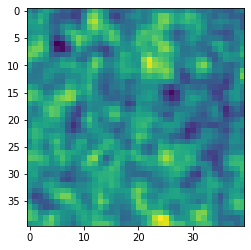

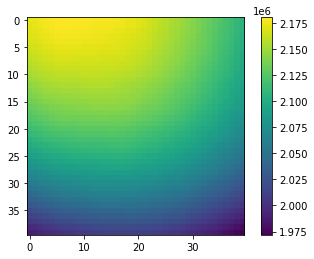

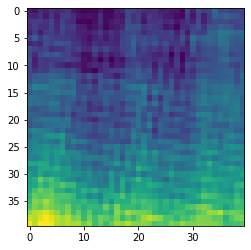

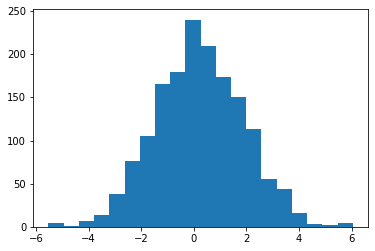

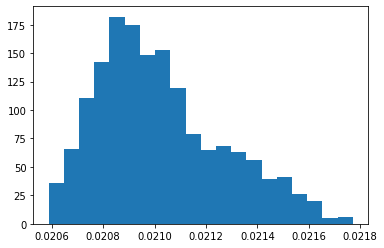

In [152]:
logging.getLogger('astropy').setLevel('ERROR')

s_var = None
s_flu = None
total_good_isgri = 0
total_max_isgri_exp = 0

body_lim = {}

body_name = 'Jupiter'

for scw in list(file_by_scw)[:10000]:
    
    r = R[R['SCW_ID'] == int(scw[:-4])]

    
    f =  fits.open(file_by_scw[scw])

    sig = [e for e in f if e.header.get('IMATYPE', None) == "SIGNIFICANCE"][0]
    var = [e for e in f if e.header.get('IMATYPE', None) == "VARIANCE"][0]
    flu = [e for e in f if e.header.get('IMATYPE', None) == "INTENSITY"][0]
    expo = [e for e in f if e.header.get('IMATYPE', None) == "EXPOSURE"][0]

    wcs = WCS(sig)

    try:
        body_i, body_j = [
            int(i) for i in 
            wcs.world_to_pixel(SkyCoord(r[body_name + '_ra'].iloc[0], r[body_name + '_dec'].iloc[0], unit="deg"))
        ]
    except:
        print("fail!")
        continue

        
    
    plot_span = 20
    detect_span = 20
    
            
    if False:
        plt.figure(figsize=(4,4))
        plt.imshow(
            #sig.data
            sig.data[body_i-plot_span:body_i+plot_span, body_j-plot_span:body_j+plot_span]
        )

    if False:
        plt.scatter(
            body_i,
            body_j,
            c='r',
            marker='o',
            s=200,
            alpha=0.2
        )

        plt.clim([0,6])
    
    f = flu.data[body_i-detect_span:body_i+detect_span, body_j-detect_span:body_j+detect_span]
    v = var.data[body_i-detect_span:body_i+detect_span, body_j-detect_span:body_j+detect_span]
    ex = expo.data[body_i-detect_span:body_i+detect_span, body_j-detect_span:body_j+detect_span]
    
    try:
        if s_var is None:
            s_var = v.copy()
            s_flu = f.copy()
            s_expo = ex.copy()
        else:
            m = ~np.isnan(v)
            m &= v > 0
            
            s_flu[m] = (f[m]/v[m] + s_flu[m]/s_var[m])/(1/v[m] + 1/s_var[m])
            s_var[m] = 1/(1/v[m] + 1/s_var[m])
            s_expo[m] += ex[m]
            total_good_isgri += r.GOOD_ISGRI.iloc[0]
            total_max_isgri_exp += np.nanmax(expo.data)
            print(f"""added {np.sum(m)} pixels exposure 
                  {np.mean(ex)} / {np.nanmax(expo.data)} / {r.GOOD_ISGRI.iloc[0]} exposure so far 
                  {np.mean(s_expo)} / {total_max_isgri_exp} / {total_good_isgri}""" )
    except:
        print("fail to read!")
        continue
        
    
    body_lim[scw] = dict(
        ic = np.nanmean(v**0.5), 
        ic_std = np.nanstd(f), 
        r = r 
    )

    
plt.figure()
plt.imshow(s_flu/s_var**0.5)


plt.figure()
plt.imshow(s_expo / total_max_isgri_exp * total_good_isgri)
plt.colorbar()

plt.figure()
plt.imshow(s_var**0.5)


plt.figure()
plt.hist(
    (s_flu/s_var**0.5).flatten(),
    20,
)

plt.figure()
_ = plt.hist(
    (s_var**0.5).flatten(),
    20,
)

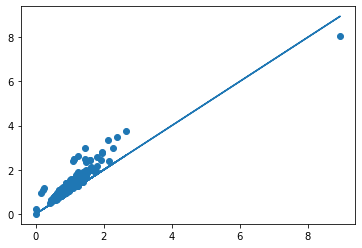

In [158]:
plt.figure()

plt.scatter(
    [ l['ic'] for scw, l in body_lim.items() ],
    [ l['ic_std'] for scw, l in body_lim.items() ],
)

plt.plot(
    [ l['ic'] for scw, l in body_lim.items() ],
    [ l['ic'] for scw, l in body_lim.items() ],
)

In [ ]:
# fraction of ISGRI exposure

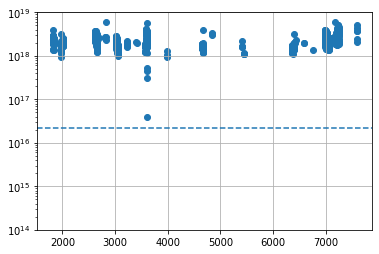

In [161]:
plt.figure()

plt.scatter(
    [ l['r']['IJD_START'].iloc[0] for s, l in body_lim.items()],
    [ 
        (2*np.pi * (l['r'][body_name + '_distance_cm'].iloc[0] * u.cm)**2 * l['ic'] / 150. * 1e-8 * u.erg/u.cm**2/u.s).to(u.erg/u.s).value
        for s, l in body_lim.items()
    ]    
)

plt.semilogy()

plt.grid()

plt.ylim([1e14, 1e19])

plt.axhline(2.2e16, ls='--')

In [179]:
L = np.array([ 
        (2*np.pi * (l['r'][body_name + '_distance_cm'].iloc[0] * u.cm)**2 * 
             l['ic'] * 5.20e-11 * u.erg/u.cm**2/u.s).to(u.erg/u.s).value
        for s, l in body_lim.items()
        if not np.isnan(l['ic'])  and not np.isinf(l['ic']) and l['ic'] > 0
    ])


L_sum =  (1/np.sum(1/L**2))**0.5
E = np.sum([ l['r']['GOOD_ISGRI'].iloc[0] for s, l in body_lim.items()])

2.2E16/L_sum, L_sum, E

(0.9158822644569583, 2.4020554664899164e+16, 3951751)

In [174]:
np.nanmean(s_var**0.5) * 5e-11 / 1e-8

0.00010510750114917756

In [175]:
from IPython.display import Image, display

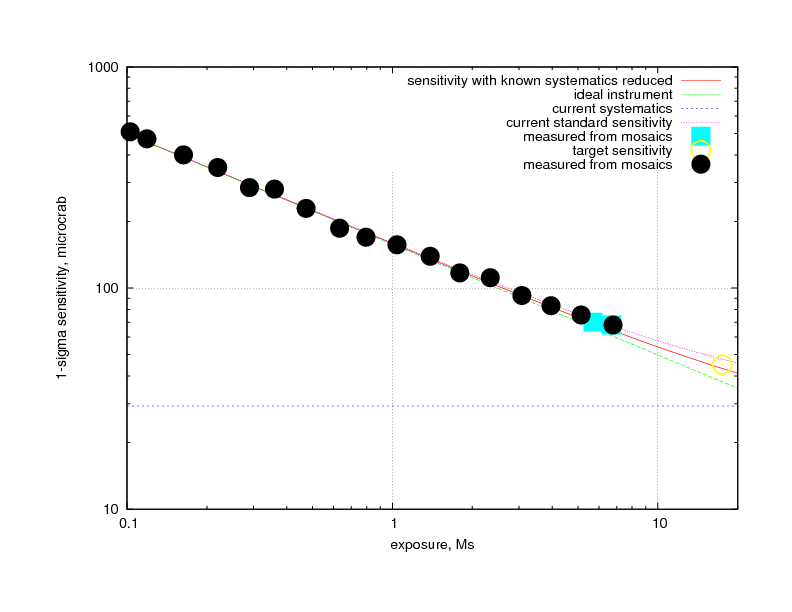

In [180]:
import requests

c = requests.get("https://www.isdc.unige.ch/~savchenk/sensitivities_broad.png.1396624636.8f54aab812").content

display(Image(c))

In [ ]:
plt.figure()

plt.imshow(var.data)

plt.clim([
    np.quantile(var.data.flatten(), 0.1),
    np.quantile(var.data.flatten(), 0.9),
])